In [69]:
import pandas as pd
import numpy as np
df_T = pd.read_csv("/Users/zappy/Downloads/df_all_transaction_buyer_seller-4.csv")
df_Alchemy_2 = pd.read_csv("/Users/zappy/df_Alchemy_2.csv")
df_P = pd.read_csv("/Users/zappy/Downloads/Price_Without_Sale_Main_Marketplace_And_Mint.csv")
df_Mint = df_T[df_T['From']=="0x0000000000000000000000000000000000000000"]
df_Alchemy_adjust = df_Alchemy_2.drop_duplicates(subset=["Hash","TokenID"]).copy()
df_Alchemy_adjust.Marketplace.replace(["seaport", "wyvern","x2y2",'looksrare'],["Opensea","Opensea","X2Y2","LooksRare"],inplace=True)
df_Alchemy_adjust = df_Alchemy_adjust.rename(columns={"Price":"Value"})

In [244]:
DF_Advanced = pd.read_csv("/Users/zappy/Downloads/Price_Without_Sale_Main_Marketplace_And_Mint.csv")
#DF_Advanced["Type"] = "Sale"
DF_Advanced

Value       Type  Currency  \
0        0.0  Transfert  ETHEREUM   
1        0.0  Transfert  ETHEREUM   
2        0.0  Transfert  ETHEREUM   
3        0.0  Transfert  ETHEREUM   
4        0.0  Transfert  ETHEREUM   
...      ...        ...       ...   
52141    0.0    Staking       APE   
52142    0.0  Transfert  ETHEREUM   
52143    0.0  Transfert  ETHEREUM   
52144    0.0    Staking       APE   
52145    0.0    Staking       APE   

                                                    Hash Marketplace  \
0      0x3f9cfb4355bd5a3e0571cc1ad08563367e59c7e51551...        BAYC   
1      0xf040fcc3dbad5eafc05f7ffba7e6ec5d97c94d8c7697...        BAYC   
2      0xa807da92f61249f97ba8236d2f6aec0307e44b48f598...        BAYC   
3      0xb418ee03704ba65565aa46a718c1133ac15f52439ff6...        BAYC   
4      0xbd32b83f175208c2e4cf62c1da49c8a2f5b737ce0d80...        BAYC   
...                                                  ...         ...   
52141  0xdb356cd961b8f8a78b3609a038892e4f90effb4c880a...     BendDAO   
52142  0x42499c0e4dfc7000668a56bd388b16675013ea846508...     Opensea   
52143  0x7c15525e6ccab03f0915d76154beb4655963223e21cb...        BAYC   
52144  0x67738ec88b211a3d8ea1ffc4c4f86acbe2866c6f9c51...     BendDAO   
52145  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...       Other   

                    Possible_Contract_Interaction  
0      0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D  
1      0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D  
2      0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D  
3      0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D  
4      0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D  
...                                           ...  
52141  0x044A97AC566F348B9f229601F1240E5d1758013A  
52142  0x0000000000c2d145a2526bD8C716263bFeBe1A72  
52143  0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D  
52144  0xDAFCe4AcC2703A24F29d1321AdAADF5768F54642  
52145  0xeefBa1e63905eF1D7ACbA5a8513c70307C1cE441  

[52146 rows x 6 columns]

In [93]:
from web3 import Web3

In [94]:
import requests

url = "https://eth-mainnet.g.alchemy.com/nft/v2/0X0x7VgU613zYc1Bjl2H5R54y9YulOYq/getNFTSales?fromBlock=0&toBlock=latest&order=asc&contractAddress=0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

data = response.json()

results = []
#print(response.json())
final_block = 16600722

results += data["nftSales"]

last_block = data["nftSales"][-1]["blockNumber"]
#print(data["nftSales"][-1],data["nftSales"][-5]["blockNumber"], data["nftSales"][-4]["blockNumber"])

# Loop through the remaining pages
while True:
    #url = f"https://api.etherscan.io/api?module=logs&action=getLogs&fromBlock={last_block}&toBlock={final_block}&address={contract_address}&topic0={topic0}&apikey={api_key}"
    #url = f"https://api.etherscan.io/api?module=account&action=tokennfttx&contractaddress={contract_address}&fromBlock={last_block}&toBlock={final_block}&sort=asc&apikey={api_key}"
    url = f"https://eth-mainnet.g.alchemy.com/nft/v2/0X0x7VgU613zYc1Bjl2H5R54y9YulOYq/getNFTSales?fromBlock={last_block}&toBlock={final_block}&order=asc&contractAddress=0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D"


    response = requests.get(url)
    data = response.json()
    #print(data["result"][-1])
    if len(data["nftSales"]) == 0 or last_block==data["nftSales"][-1]["blockNumber"]:
        break
    results += data["nftSales"]
    if "blockNumber" in data["nftSales"][-1]:
      last_block = data["nftSales"][-1]["blockNumber"]
    else:
      print("No more transactions found")
      break
    print(last_block)

12352358
12356331
12360202
12370564
12426798
12518886
12540440
12553794
12583343
12602845
12651759
12669803
12704229
12806653
12838392
12910073
12957315
13029974
13101630
13187511
13520531
13736792
14007215
14320808
14616407
14862985
15307118
15984753
16209122
16414101
16599950


In [95]:
Hash = []
Price = []
Currency = []
Marketplace = []
TokenID = []
import pandas as pd
from datetime import datetime




for i in results:
  Hash.append(i["transactionHash"])
  Marketplace.append(i["marketplace"])
  Currency.append(i["sellerFee"]["symbol"])
  TokenID.append(i["tokenId"])
  if i["sellerFee"]["symbol"]=="ETH":
    div = 10**18
  if i["sellerFee"]["symbol"]=="WETH":
    div = 10**18
  if i["sellerFee"]["symbol"]=="USDC":
    div = 1_000_000
  if i["sellerFee"]["symbol"]=="APE":
    div = 10**18
  if i["sellerFee"]["symbol"]=="":
    div = 10**18
  if i["sellerFee"]["symbol"]=="DAI":
    div = 10**18
  
  while True:
    try:
      Price.append((int(i["sellerFee"]["amount"])+int(i["protocolFee"]["amount"])+int(i["royaltyFee"]["amount"]))/div)
      break
    except:
      pass
    try:
      Price.append((int(i["sellerFee"]["amount"])+int(i["royaltyFee"]["amount"]))/div)
      break
    except:
      pass
    try:
      Price.append((int(i["sellerFee"]["amount"])+int(i["protocolFee"]["amount"]))/div)
      break
    except:
      #print(i["sellerFee"]["symbol"])
      Price.append(int(i["sellerFee"]["amount"])/div)
      break



  

print(len(Hash), len(Price),len(Currency), len(Marketplace))
  


df_Alchemy = pd.DataFrame({'Hash': Hash, 'Price': Price, 'Currency': Currency, 'Marketplace':Marketplace, "TokenID":TokenID})


#df_Alchemy[(df_Alchemy["Currency"]==""))] #currency=blur token
#df_Alchemy[(df_Alchemy["Currency"]=="") & (df_Alchemy["Marketplace"]!="blur")] #currency=ETH
#df_Alchemy[(df_Alchemy["Hash"]=="0xde4806a582410a7430fe3d45db0eaf822247f677e9ed9966867422bf85838bf7")]


df_Alchemy.to_csv("df_Alchemy_2.csv",index=False)

  




31431 31431 31431 31431


In [224]:

def Price_Mint(row):
  return float(0.08*df_Mint[df_Mint["Hash"]==row[0]].groupby("Hash").count()["Block"].values[0])

df_Mint["Value"] = df_Mint.apply(Price_Mint,axis=1)
df_Mint["Value"][df_Mint["To"]=="0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03"] = 0


/var/folders/s8/m6kqd0hs2hq505ml3ydqxqd40000gn/T/ipykernel_15375/3574420273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Mint["Value"] = df_Mint.apply(Price_Mint,axis=1)
/var/folders/s8/m6kqd0hs2hq505ml3ydqxqd40000gn/T/ipykernel_15375/3574420273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Mint["Value"][df_Mint["To"]=="0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03"] = 0
/var/folders/s8/m6kqd0hs2hq505ml3ydqxqd40000gn/T/ipykernel_15375/3574420273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

In [102]:
df_T[df_T["Hash"].isin(df_Alchemy_adjust.Hash.values)]

Hash     Block  \
387     0x327a3ae8a7c87c4483e7caadd3c1fa80c5cad590ec31...  12341856   
698     0x620f3257889feb7e58d552be4ab7662a97014fff5567...  12345019   
749     0x6c20d8a20bed7ebcf6dba6221e82ec8ce4b48dfa487b...  12345174   
755     0xc5c7118fdac65a3a68d1b6a34d88068d954b58e75dd1...  12345181   
756     0x3c482aad0fa3f087afe00799905f3dbdccb683aaf78d...  12345181   
...                                                   ...       ...   
149941  0xf6e8a6a2bba4af05e7e59023324d7d913e4a0e6af4b0...  16591102   
149980  0x034e62066e32b57ff80e590205192c22c331ac4bfe81...  16592562   
150070  0x12740dcecfbc5200e1fdf573ad4afe8a108ffc0ae928...  16594919   
150496  0xde4806a582410a7430fe3d45db0eaf822247f677e9ed...  16599900   
150498  0x11aa4e082a63ed4cd5a39043d91f815afe2f8db7556f...  16599950   

                                              From  \
387     0x8e05bd9fa3059ec69c15bc1a6f4d94f0ac26ce00   
698     0x88be3fa60ede9f532af10aba5690dfc254db929b   
749     0x3d6a89c8751a45dd577a4c1f3b34e71c58236193   
755     0x9795a9baac2f17e7c7f11686bc6bc2afc3d84612   
756     0x3d6a89c8751a45dd577a4c1f3b34e71c58236193   
...                                            ...   
149941  0xc926fb2120bcb1f8c667926189d862bc31ffd6a0   
149980  0x5d5335e6bea4b12dcb942cec1da951ae63f2ae64   
150070  0x31004f28babda1f632cb445944892b04a411e7f7   
150496  0xd5ee00b7babd9374d32159cd7cd82bb99ef831fd   
150498  0x2ea909dcf92e58306aea9c17052c1f5b63200589   

                                                To  TokenID  \
387     0x0b742783bfac8d4b6d332e5d1b63f433fcd8c0a0       33   
698     0x0b742783bfac8d4b6d332e5d1b63f433fcd8c0a0      586   
749     0x09238a2aa20600e9773990677d17fef91e688523      554   
755     0x09238a2aa20600e9773990677d17fef91e688523      665   
756     0x09238a2aa20600e9773990677d17fef91e688523      551   
...                                            ...      ...   
149941  0xb4f06845abd220e3a353e08dde57b187c3ff80bf     8918   
149980  0xe15a6630445ba0975de2c5a3a9ad45b15f7d4c7e     6501   
150070  0x3adc65bb7ecfd4482ae6fc9a7d5b4dcc7e248263     9851   
150496  0xe1939fe81a15d927d397f387c3b92bf5e38b6cad     2508   
150498  0x754546a93304602561140fb112c896bc0345d5bd     9540   

                       Date                                       Buyer  \
387     2021-04-30 12:38:59  0x0b742783bfac8d4b6d332e5d1b63f433fcd8c0a0   
698     2021-05-01 00:15:48  0x0b742783bfac8d4b6d332e5d1b63f433fcd8c0a0   
749     2021-05-01 00:50:09  0x09238a2aa20600e9773990677d17fef91e688523   
755     2021-05-01 00:51:32  0x09238a2aa20600e9773990677d17fef91e688523   
756     2021-05-01 00:51:32  0x09238a2aa20600e9773990677d17fef91e688523   
...                     ...                                         ...   
149941  2023-02-09 12:09:47  0xb4f06845abd220e3a353e08dde57b187c3ff80bf   
149980  2023-02-09 17:03:35  0xe15a6630445ba0975de2c5a3a9ad45b15f7d4c7e   
150070  2023-02-10 00:57:47  0x3adc65bb7ecfd4482ae6fc9a7d5b4dcc7e248263   
150496  2023-02-10 17:38:59  0xe1939fe81a15d927d397f387c3b92bf5e38b6cad   
150498  2023-02-10 17:49:11  0x754546a93304602561140fb112c896bc0345d5bd   

                                            Seller  
387     0x8e05bd9fa3059ec69c15bc1a6f4d94f0ac26ce00  
698     0x88be3fa60ede9f532af10aba5690dfc254db929b  
749     0x3d6a89c8751a45dd577a4c1f3b34e71c58236193  
755     0x9795a9baac2f17e7c7f11686bc6bc2afc3d84612  
756     0x3d6a89c8751a45dd577a4c1f3b34e71c58236193  
...                                            ...  
149941  0xc926fb2120bcb1f8c667926189d862bc31ffd6a0  
149980  0x5d5335e6bea4b12dcb942cec1da951ae63f2ae64  
150070  0x31004f28babda1f632cb445944892b04a411e7f7  
150496  0xd5ee00b7babd9374d32159cd7cd82bb99ef831fd  
150498  0x2ea909dcf92e58306aea9c17052c1f5b63200589  

[31699 rows x 8 columns]

In [20]:
len(df_T[df_T["Hash"].isin(df_Alchemy.Hash.values)]) + len(df_T[df_T["Hash"].isin(df_P.Hash.values)]) + len(df_T[df_T["Hash"].isin(df_Mint.Hash)])

150530

In [21]:
df_T_Alchemy = df_T[df_T["Hash"].isin(df_Alchemy_adjust.Hash.values)]
df_T_Alchemy["copy_index"] = df_T_Alchemy.index
df_T_Alchemy.head()

/var/folders/s8/m6kqd0hs2hq505ml3ydqxqd40000gn/T/ipykernel_15375/2302014070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T_Alchemy["copy_index"] = df_T_Alchemy.index


Hash     Block  \
387  0x327a3ae8a7c87c4483e7caadd3c1fa80c5cad590ec31...  12341856   
698  0x620f3257889feb7e58d552be4ab7662a97014fff5567...  12345019   
749  0x6c20d8a20bed7ebcf6dba6221e82ec8ce4b48dfa487b...  12345174   
755  0xc5c7118fdac65a3a68d1b6a34d88068d954b58e75dd1...  12345181   
756  0x3c482aad0fa3f087afe00799905f3dbdccb683aaf78d...  12345181   

                                           From  \
387  0x8e05bd9fa3059ec69c15bc1a6f4d94f0ac26ce00   
698  0x88be3fa60ede9f532af10aba5690dfc254db929b   
749  0x3d6a89c8751a45dd577a4c1f3b34e71c58236193   
755  0x9795a9baac2f17e7c7f11686bc6bc2afc3d84612   
756  0x3d6a89c8751a45dd577a4c1f3b34e71c58236193   

                                             To  TokenID                 Date  \
387  0x0b742783bfac8d4b6d332e5d1b63f433fcd8c0a0       33  2021-04-30 12:38:59   
698  0x0b742783bfac8d4b6d332e5d1b63f433fcd8c0a0      586  2021-05-01 00:15:48   
749  0x09238a2aa20600e9773990677d17fef91e688523      554  2021-05-01 00:50:09   
755  0x09238a2aa20600e9773990677d17fef91e688523      665  2021-05-01 00:51:32   
756  0x09238a2aa20600e9773990677d17fef91e688523      551  2021-05-01 00:51:32   

                                          Buyer  \
387  0x0b742783bfac8d4b6d332e5d1b63f433fcd8c0a0   
698  0x0b742783bfac8d4b6d332e5d1b63f433fcd8c0a0   
749  0x09238a2aa20600e9773990677d17fef91e688523   
755  0x09238a2aa20600e9773990677d17fef91e688523   
756  0x09238a2aa20600e9773990677d17fef91e688523   

                                         Seller  copy_index  
387  0x8e05bd9fa3059ec69c15bc1a6f4d94f0ac26ce00         387  
698  0x88be3fa60ede9f532af10aba5690dfc254db929b         698  
749  0x3d6a89c8751a45dd577a4c1f3b34e71c58236193         749  
755  0x9795a9baac2f17e7c7f11686bc6bc2afc3d84612         755  
756  0x3d6a89c8751a45dd577a4c1f3b34e71c58236193         756

In [263]:
df_temp = pd.merge(df_T_Alchemy, df_Alchemy_adjust, on=["Hash","TokenID"], how='left')
df_temp["Type"]="Sale"
df_temp["Possible_Contract_Interaction"]="Already_defined"



In [278]:
df_Mint["Type"] = "Mint"
df_Mint["Marketplace"] = "BAYC"
df_Mint["Currency"] = "ETHEREUM"
df_Mint["Possible_Contract_Interaction"] = "Already_defined"

/var/folders/s8/m6kqd0hs2hq505ml3ydqxqd40000gn/T/ipykernel_15375/2346421335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Mint["Type"] = "Mint"
/var/folders/s8/m6kqd0hs2hq505ml3ydqxqd40000gn/T/ipykernel_15375/2346421335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Mint["Marketplace"] = "BAYC"
/var/folders/s8/m6kqd0hs2hq505ml3ydqxqd40000gn/T/ipykernel_15375/2346421335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [230]:
df_Mint["copy_index"] = df_Mint.index

/var/folders/s8/m6kqd0hs2hq505ml3ydqxqd40000gn/T/ipykernel_15375/3636370954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Mint["copy_index"] = df_Mint.index


In [279]:
df_temp_2 = pd.concat([df_temp, df_Mint], axis=0)
df_temp_2

Hash     Block  \
0      0x327a3ae8a7c87c4483e7caadd3c1fa80c5cad590ec31...  12341856   
1      0x620f3257889feb7e58d552be4ab7662a97014fff5567...  12345019   
2      0x6c20d8a20bed7ebcf6dba6221e82ec8ce4b48dfa487b...  12345174   
3      0xc5c7118fdac65a3a68d1b6a34d88068d954b58e75dd1...  12345181   
4      0x3c482aad0fa3f087afe00799905f3dbdccb683aaf78d...  12345181   
...                                                  ...       ...   
10462  0xda317254a8f6313cb396678572ad400cee3cc1cec561...  12347249   
10463  0xda317254a8f6313cb396678572ad400cee3cc1cec561...  12347249   
10464  0xda317254a8f6313cb396678572ad400cee3cc1cec561...  12347249   
10465  0xda317254a8f6313cb396678572ad400cee3cc1cec561...  12347249   
10466  0xe26d43ab6702c03ed0fe9eb85a011f1edda55125c0cd...  12347249   

                                             From  \
0      0x8e05bd9fa3059ec69c15bc1a6f4d94f0ac26ce00   
1      0x88be3fa60ede9f532af10aba5690dfc254db929b   
2      0x3d6a89c8751a45dd577a4c1f3b34e71c58236193   
3      0x9795a9baac2f17e7c7f11686bc6bc2afc3d84612   
4      0x3d6a89c8751a45dd577a4c1f3b34e71c58236193   
...                                           ...   
10462  0x0000000000000000000000000000000000000000   
10463  0x0000000000000000000000000000000000000000   
10464  0x0000000000000000000000000000000000000000   
10465  0x0000000000000000000000000000000000000000   
10466  0x0000000000000000000000000000000000000000   

                                               To  TokenID  \
0      0x0b742783bfac8d4b6d332e5d1b63f433fcd8c0a0       33   
1      0x0b742783bfac8d4b6d332e5d1b63f433fcd8c0a0      586   
2      0x09238a2aa20600e9773990677d17fef91e688523      554   
3      0x09238a2aa20600e9773990677d17fef91e688523      665   
4      0x09238a2aa20600e9773990677d17fef91e688523      551   
...                                           ...      ...   
10462  0xf60e20b48203670d0bd29216d09d4107f91b9405     9995   
10463  0xf60e20b48203670d0bd29216d09d4107f91b9405     9996   
10464  0xf60e20b48203670d0bd29216d09d4107f91b9405     9997   
10465  0xf60e20b48203670d0bd29216d09d4107f91b9405     9998   
10466  0xb0e984d4bf1830dcb6c8c4e0f81d0869d2f037b1     9999   

                      Date                                       Buyer  \
0      2021-04-30 12:38:59  0x0b742783bfac8d4b6d332e5d1b63f433fcd8c0a0   
1      2021-05-01 00:15:48  0x0b742783bfac8d4b6d332e5d1b63f433fcd8c0a0   
2      2021-05-01 00:50:09  0x09238a2aa20600e9773990677d17fef91e688523   
3      2021-05-01 00:51:32  0x09238a2aa20600e9773990677d17fef91e688523   
4      2021-05-01 00:51:32  0x09238a2aa20600e9773990677d17fef91e688523   
...                    ...                                         ...   
10462  2021-05-01 08:35:17  0xf60e20b48203670d0bd29216d09d4107f91b9405   
10463  2021-05-01 08:35:17  0xf60e20b48203670d0bd29216d09d4107f91b9405   
10464  2021-05-01 08:35:17  0xf60e20b48203670d0bd29216d09d4107f91b9405   
10465  2021-05-01 08:35:17  0xf60e20b48203670d0bd29216d09d4107f91b9405   
10466  2021-05-01 08:35:17  0xb0e984d4bf1830dcb6c8c4e0f81d0869d2f037b1   

                                           Seller  copy_index  Value  \
0      0x8e05bd9fa3059ec69c15bc1a6f4d94f0ac26ce00         387   0.16   
1      0x88be3fa60ede9f532af10aba5690dfc254db929b         698   0.10   
2      0x3d6a89c8751a45dd577a4c1f3b34e71c58236193         749   0.08   
3      0x9795a9baac2f17e7c7f11686bc6bc2afc3d84612         755   0.08   
4      0x3d6a89c8751a45dd577a4c1f3b34e71c58236193         756   0.08   
...                                           ...         ...    ...   
10462  0x0000000000000000000000000000000000000000       10462   0.40   
10463  0x0000000000000000000000000000000000000000       10463   0.40   
10464  0x0000000000000000000000000000000000000000       10464   0.40   
10465  0x0000000000000000000000000000000000000000       10465   0.40   
10466  0x0000000000000000000000000000000000000000       10466   0.08   

       Currency Marketplace  Type Possible_Contract_Interaction  
0        

In [249]:
#108625
df_Advanced_merged = pd.merge(DF_T_Advanced,DF_Advanced)

In [280]:
DF_FINAL = pd.concat([df_temp_2,df_Advanced_merged],axis=0)

In [281]:
DF_FINAL[DF_FINAL[["Hash","TokenID"]].apply(tuple,1).isin(df_T.apply(tuple,1))]

Empty DataFrame
Columns: [Hash, Block, From, To, TokenID, Date, Buyer, Seller, copy_index, Value, Currency, Marketplace, Type, Possible_Contract_Interaction]
Index: []

In [282]:
DF_FINAL.sort_values(by=['copy_index'], inplace=True)

In [283]:
DF_FINAL = DF_FINAL.rename(columns={"copy_index":"index"}).set_index("index")


In [284]:
DF_FINAL["Collection"] = "Bored Ape Yatch Club"
DF_FINAL

Hash     Block  \
index                                                                 
0       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
1       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
2       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
3       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
4       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
...                                                   ...       ...   
150525  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150526  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150527  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150528  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150529  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   

                                              From  \
index                                                
0       0x0000000000000000000000000000000000000000   
1       0x0000000000000000000000000000000000000000   
2       0x0000000000000000000000000000000000000000   
3       0x0000000000000000000000000000000000000000   
4       0x0000000000000000000000000000000000000000   
...                                            ...   
150525  0xdafce4acc2703a24f29d1321adaadf5768f54642   
150526  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150527  0xdafce4acc2703a24f29d1321adaadf5768f54642   
150528  0x99b019edc78ec72893fabc6667672b2fefa9cc44   
150529  0xdafce4acc2703a24f29d1321adaadf5768f54642   

                                                To  TokenID  \
index                                                         
0       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        0   
1       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        1   
2       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        2   
3       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        3   
4       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        4   
...                                            ...      ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24     2281   
150526  0xdafce4acc2703a24f29d1321adaadf5768f54642     8073   
150527  0x99b019edc78ec72893fabc6667672b2fefa9cc44     8073   
150528  0xdafce4acc2703a24f29d1321adaadf5768f54642     8073   
150529  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24     8073   

                       Date                                       Buyer  \
index                                                                     
0       2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
1       2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
2       2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
3       2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
4       2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
...                     ...                                         ...   
150525  2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150526  2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150527  2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150528  2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150529  2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   

                                            Seller  Value  Currency  \
index                                                                 
0       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
1       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
2       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
3       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
4       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
...                                            ...    ...       ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0     

In [285]:
DF_FINAL.to_csv("DF_FINAL_BAYC.csv",index=False)

In [490]:
DF_FINAL

Hash     Block  \
index                                                                 
0       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
1       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
2       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
3       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
4       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
...                                                   ...       ...   
150525  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150526  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150527  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150528  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150529  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   

                                              From  \
index                                                
0       0x0000000000000000000000000000000000000000   
1       0x0000000000000000000000000000000000000000   
2       0x0000000000000000000000000000000000000000   
3       0x0000000000000000000000000000000000000000   
4       0x0000000000000000000000000000000000000000   
...                                            ...   
150525  0xdafce4acc2703a24f29d1321adaadf5768f54642   
150526  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150527  0xdafce4acc2703a24f29d1321adaadf5768f54642   
150528  0x99b019edc78ec72893fabc6667672b2fefa9cc44   
150529  0xdafce4acc2703a24f29d1321adaadf5768f54642   

                                                To  TokenID  \
index                                                         
0       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        0   
1       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        1   
2       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        2   
3       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        3   
4       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        4   
...                                            ...      ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24     2281   
150526  0xdafce4acc2703a24f29d1321adaadf5768f54642     8073   
150527  0x99b019edc78ec72893fabc6667672b2fefa9cc44     8073   
150528  0xdafce4acc2703a24f29d1321adaadf5768f54642     8073   
150529  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24     8073   

                       Date                                       Buyer  \
index                                                                     
0       2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
1       2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
2       2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
3       2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
4       2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
...                     ...                                         ...   
150525  2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150526  2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150527  2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150528  2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150529  2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   

                                            Seller  Value  Currency  \
index                                                                 
0       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
1       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
2       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
3       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
4       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
...                                            ...    ...       ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0     

In [376]:
%%time
import requests
from tqdm import tqdm

Liste_Name = []
Liste_Exception = []

r = requests.Session()
#df_Contract_name = pd.DataFrame({"Possible_Contract_Interaction":DF_FINAL.Possible_Contract_Interaction.unique(),"Contract_Name":Liste_Name})

for contract in tqdm(DF_FINAL.Possible_Contract_Interaction.unique()[1:]):
    if contract[:2]=="0x":
        while True:
            try:
                url = f"https://api.etherscan.io/api?module=contract&action=getsourcecode&address={contract}&apikey=1UPGACE37XFASVIVXS3RR77IECAC5UMV27"

                if 'ContractName' in (requests.get(url).json()["result"][-1].keys()):

                    name = r.get(url).json()["result"][-1]['ContractName']
                    if name=="":
                        name = "No Name"
                    Liste_Name.append(name)
                    break
                else :
                    name = "No Name"
                    Liste_Name.append(name)
                    break
            except Exception as e:
                Liste_Exception.append(e)
                print(e)
                continue
    

  1%|▎                                        | 17/2138 [00:16<34:26,  1.03it/s]


KeyboardInterrupt: 

#ETH PRICE

In [442]:
url = "https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=USD&days=1200&interval=hourly"
price_ETH= requests.get(url).json()["prices"]

In [444]:
Timestamp = []
Price_USD = []
for i in price_ETH:
    Timestamp.append(i[0])
    Price_USD.append(i[])

        

In [460]:

df_Price_ETH_USD = pd.DataFrame({"Timestamp" : Timestamp,"Price_USD" : Price_USD})
df_Price_ETH_USD

Timestamp    Price_USD
0     1438905600000     2.831620
1     1438992000000     1.330750
2     1439164800000     0.687586
3     1439251200000     1.067379
4     1439337600000     1.256613
...             ...          ...
2749  1676505600000  1674.858207
2750  1676592000000  1646.143502
2751  1676678400000  1697.084867
2752  1676685250000  1699.664084
2753  1676685250000  1699.664084

[2754 rows x 2 columns]

In [462]:
df_Price_ETH_USD["Timestamp"] = pd.to_datetime(df_Price_ETH_USD['Timestamp']/1000, unit='s')
df_Price_ETH_USD

Timestamp    Price_USD
0    2015-08-07 00:00:00     2.831620
1    2015-08-08 00:00:00     1.330750
2    2015-08-10 00:00:00     0.687586
3    2015-08-11 00:00:00     1.067379
4    2015-08-12 00:00:00     1.256613
...                  ...          ...
2749 2023-02-16 00:00:00  1674.858207
2750 2023-02-17 00:00:00  1646.143502
2751 2023-02-18 00:00:00  1697.084867
2752 2023-02-18 01:54:10  1699.664084
2753 2023-02-18 01:54:10  1699.664084

[2754 rows x 2 columns]

In [475]:
df_Price_ETH_USD["Day"] = df_Price_ETH_USD["Timestamp"].apply(lambda x : x.day).values
df_Price_ETH_USD["Month"] = df_Price_ETH_USD["Timestamp"].apply(lambda x : x.month).values
df_Price_ETH_USD["Year"] = df_Price_ETH_USD["Timestamp"].apply(lambda x : x.year).values

In [476]:
df_Price_ETH_USD

Timestamp    Price_USD  Day  Month  Year
0    2015-08-07 00:00:00     2.831620    7      8  2015
1    2015-08-08 00:00:00     1.330750    8      8  2015
2    2015-08-10 00:00:00     0.687586   10      8  2015
3    2015-08-11 00:00:00     1.067379   11      8  2015
4    2015-08-12 00:00:00     1.256613   12      8  2015
...                  ...          ...  ...    ...   ...
2749 2023-02-16 00:00:00  1674.858207   16      2  2023
2750 2023-02-17 00:00:00  1646.143502   17      2  2023
2751 2023-02-18 00:00:00  1697.084867   18      2  2023
2752 2023-02-18 01:54:10  1699.664084   18      2  2023
2753 2023-02-18 01:54:10  1699.664084   18      2  2023

[2754 rows x 5 columns]

#PRICE APE

In [467]:
df_Contract_name = pd.DataFrame({"Possible_Contract_Interaction":DF_FINAL.Possible_Contract_Interaction.unique(),"Contract_Name":L})
df_Contract_name

Possible_Contract_Interaction  \
0                                Already_defined   
1     0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D   
2     0x92C006165404bEa116dD2306BF844f93Df68Cc8D   
3     0xcd4EC7b66fbc029C116BA9Ffb3e59351c20B5B06   
4     0x32345A6a908ccB686c5f7f121DB47C9D493b4d92   
...                                          ...   
2134  0x3443C919FDde0BeBE04271FCca5c4f4beeaC13EB   
2135  0xE1D69648b92169084aed072318F48A2F7452f02f   
2136  0x54947C272B5eBA8325Fb74E488517457C8979309   
2137  0xEfA7bb8d33cE98DA11EEbae74ee2FcFA923D2e57   
2138  0x62945089E2eb925B50c47C002Ebfd62B03106200   

                              Contract_Name  
0                                   No Name  
1                         BoredApeYachtClub  
2                      OwnableDelegateProxy  
3                                ExchangeV1  
4                      OwnableDelegateProxy  
...                                     ...  
2134                        GnosisSafeProxy  
2135                        GnosisSafeProxy  
2136                             ApeStaking  
2137                        GnosisSafeProxy  
2138  InitializableAdminUpgradeabilityProxy  

[2139 rows x 2 columns]

In [518]:
DF_FINAL_2 = DF_FINAL.merge(df_Contract_name,on="Possible_Contract_Interaction", how="left")
DF_FINAL_2

Hash     Block  \
0       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
1       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
2       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
3       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
4       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
...                                                   ...       ...   
150525  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150526  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150527  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150528  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150529  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   

                                              From  \
0       0x0000000000000000000000000000000000000000   
1       0x0000000000000000000000000000000000000000   
2       0x0000000000000000000000000000000000000000   
3       0x0000000000000000000000000000000000000000   
4       0x0000000000000000000000000000000000000000   
...                                            ...   
150525  0xdafce4acc2703a24f29d1321adaadf5768f54642   
150526  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150527  0xdafce4acc2703a24f29d1321adaadf5768f54642   
150528  0x99b019edc78ec72893fabc6667672b2fefa9cc44   
150529  0xdafce4acc2703a24f29d1321adaadf5768f54642   

                                                To  TokenID  \
0       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        0   
1       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        1   
2       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        2   
3       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        3   
4       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        4   
...                                            ...      ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24     2281   
150526  0xdafce4acc2703a24f29d1321adaadf5768f54642     8073   
150527  0x99b019edc78ec72893fabc6667672b2fefa9cc44     8073   
150528  0xdafce4acc2703a24f29d1321adaadf5768f54642     8073   
150529  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24     8073   

                       Date                                       Buyer  \
0       2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
1       2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
2       2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
3       2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
4       2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
...                     ...                                         ...   
150525  2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150526  2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150527  2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150528  2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150529  2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   

                                            Seller  Value  Currency  \
0       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
1       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
2       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
3       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
4       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
...                                            ...    ...       ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE   
150526  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE   
150527  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE   
150528  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE   
150529  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE   

       Marketplace     Type             

In [519]:
DF_FINAL_2["Date"] = pd.to_datetime(DF_FINAL_2["Date"])

In [520]:
DF_FINAL_2["Day"] = DF_FINAL_2["Date"].apply(lambda x : x.day).values
DF_FINAL_2["Month"] = DF_FINAL_2["Date"].apply(lambda x : x.month).values
DF_FINAL_2["Year"] = DF_FINAL_2["Date"].apply(lambda x : x.year).values

In [561]:
DF_FINAL_3 = DF_FINAL_2.merge(df_Price_ETH_USD,on=["Day","Month","Year"],how="left")
#DF_FINAL_3.drop(["Day","Month","Year","Timestamp"],axis=1,inplace=True)
#DF_FINAL_3

In [517]:
#max(DF_FINAL_2.Block.values)


Hash     Block  \
0       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
1       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
2       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
3       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
4       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
...                                                   ...       ...   
150525  0x8fcfeb047e68622b4c86765639e1720687d38589c9c5...  16587918   
150526  0x78cdc409c34efd454fe9cc78bba290672d1116e11fb4...  16588592   
150527  0x3d38cbf9f03c167b8aa4fbead01cd29c3765c9effc52...  16595253   
150528  0xf776e438f89d71aef60f9c1d98213be8ff9a234db95f...  16595258   
150529  0x73fb173fb16da56a19b0d8f4043e37b3d5a2ec8c9a82...  16596939   

                                              From  \
0       0x0000000000000000000000000000000000000000   
1       0x0000000000000000000000000000000000000000   
2       0x0000000000000000000000000000000000000000   
3       0x0000000000000000000000000000000000000000   
4       0x0000000000000000000000000000000000000000   
...                                            ...   
150525  0xdb5485c85bd95f38f9def0ca85499ef67dc581c0   
150526  0xdb5485c85bd95f38f9def0ca85499ef67dc581c0   
150527  0x62945089e2eb925b50c47c002ebfd62b03106200   
150528  0x62945089e2eb925b50c47c002ebfd62b03106200   
150529  0x62945089e2eb925b50c47c002ebfd62b03106200   

                                                To  TokenID  \
0       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        0   
1       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        1   
2       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        2   
3       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        3   
4       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        4   
...                                            ...      ...   
150525  0x62945089e2eb925b50c47c002ebfd62b03106200     4609   
150526  0x62945089e2eb925b50c47c002ebfd62b03106200     6688   
150527  0xdb5485c85bd95f38f9def0ca85499ef67dc581c0     4609   
150528  0xdb5485c85bd95f38f9def0ca85499ef67dc581c0     2063   
150529  0xdb5485c85bd95f38f9def0ca85499ef67dc581c0     6688   

                      Date                                       Buyer  \
0      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
1      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
2      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
3      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
4      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
...                    ...                                         ...   
150525 2023-02-09 01:28:35  0x62945089e2eb925b50c47c002ebfd62b03106200   
150526 2023-02-09 03:44:11  0x62945089e2eb925b50c47c002ebfd62b03106200   
150527 2023-02-10 02:04:47  0xdb5485c85bd95f38f9def0ca85499ef67dc581c0   
150528 2023-02-10 02:05:47  0xdb5485c85bd95f38f9def0ca85499ef67dc581c0   
150529 2023-02-10 07:43:23  0xdb5485c85bd95f38f9def0ca85499ef67dc581c0   

                                            Seller  Value  Currency  \
0       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
1       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
2       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
3       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
4       0x0000000000000000000000000000000000000000    0.0  ETHEREUM   
...                                            ...    ...       ...   
150525  0xdb5485c85bd95f38f9def0ca85499ef67dc581c0    0.0       APE   
150526  0xdb5485c85bd95f38f9def0ca85499ef67dc581c0    0.0       APE   
150527  0x62945089e2eb925b50c47c002ebfd62b03106200    0.0       APE   
150528  0x62945089e2eb925b50c47c002ebfd62b03106200    0.0       APE   
150529  0x62945089e2eb925b50c47c002ebfd62b03106200    0.0       APE   

       Marketplace     Type               Possible_C

In [468]:
#DF_FINAL.Possible_Contract_Interaction.unique()[1400]
len(L), len(DF_FINAL.Possible_Contract_Interaction.unique())

(2139, 2139)

In [ ]:
DF_FINAL.Possible_Contract_Interaction.unique()

In [404]:
c = 0
for i,j in DF_FINAL.Possible_Contract_Interaction.unique()[1:],L:
    if str(i)[:2] =="0x":
        c+=1
        
    else:
        L_new = L[:c+1].append("No Name")
        print(c)
        break
    

1400


In [391]:
DF_FINAL.Possible_Contract_Interaction.unique()

array([False, False, False, ..., False, False, False])

In [381]:
DF_FINAL.Possible_Contract_Interaction.unique()[2]

'0x92C006165404bEa116dD2306BF844f93Df68Cc8D'

In [365]:
import copy
L = copy.deepcopy(Liste_Name)

In [465]:
L = ['No Name','BoredApeYachtClub','OwnableDelegateProxy','ExchangeV1','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Exchange','OwnableDelegateProxy','AlchemyFactory','OwnableDelegateProxy','OwnableDelegateProxy','AdminUpgradeabilityProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Distribution','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','ArgentModule','Game','OwnableDelegateProxy','OwnableDelegateProxy','Alchemy','ApymonPack721','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','CloneableWallet','OwnableDelegateProxy','Converter','NFT20Cas','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','BatchTransferHelper','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','BatchSwap','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','NFTfi','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','CloneableWallet','OwnableDelegateProxy','OwnableDelegateProxy','CloneableWallet','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','TransparentUpgradeableProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','Converter','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','SwapKiwi','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','MulticallModule','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','BeaconProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','SwapKiwi','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','TransparentUpgradeableProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','ERC721VaultFactory','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','IndexERC721','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Lottery','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','IndexERC721','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','IndexERC721','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','InitializedProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','InitializedProxy','OwnableDelegateProxy','OwnableDelegateProxy','InitializedProxy','OwnableDelegateProxy','TokenSender','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','InitializedProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','NFTLotteryPoolFactory','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','NFTLotteryPool','OwnableDelegateProxy','NFTXStakingZap','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Converter','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','InitializedProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Proxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','AuctionHouse','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Proxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Proxy','OwnableDelegateProxy','OwnableDelegateProxy','Proxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','IndexERC721','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Proxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Proxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','InitializedProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','IndexERC721','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','IndexERC721','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','InitializedProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','AdminUpgradeabilityProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Proxy','Proxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','AssetWrapper','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','TransparentUpgradeableProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Proxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','NFTLotteryPool','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','IndexERC721','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','IndexERC721','OwnableDelegateProxy','OwnableDelegateProxy','Proxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Multisender','OwnableDelegateProxy','OwnableDelegateProxy','CAMP','OwnableDelegateProxy','OwnableDelegateProxy','VRFCoordinator','NFTXMarketplaceZap','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Proxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','No Name','GnosisSafeProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','WyvernExchange','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','SwapKiwi','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','GnosisSafeProxy','No Name','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','ExchangePool','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','InitializedProxy','GnosisSafeProxy','OwnableDelegateProxy','GnosisSafeProxy','ActionModule','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','NFTBridgeEntrypoint','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','InitializedProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','Proxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','AdminUpgradeabilityProxy','OwnableDelegateProxy','OwnableDelegateProxy','Proxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OperatorDoubleSig','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Proxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Proxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','InitializedProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','GnosisSafeProxy','GnosisSafeProxy','GnosisSafeProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','InitializedProxy','OwnableDelegateProxy','ERC721Delegate','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','MultiSigWallet','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Proxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','ERC721LendingPoolETH01','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','NFTXMarketplaceZap','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','No Name','No Name','Proxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','Proxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Proxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Proxy','OwnableDelegateProxy','GnosisSafeProxy','GnosisSafeProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','Proxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','ApeClaimBonusManager','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','InitializedProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','BendUpgradeableProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','InitializedProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','InitializedProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','InitializedProxy','OwnableDelegateProxy','InitializedProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','NFTXStakingZap','BNFTUpgradeableProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','DirectLoanFixedOffer','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','BatchSwap','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Proxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','AssetWrapper','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','WyvernExchangeWithBulkCancellations','OwnableDelegateProxy','OwnableDelegateProxy','GemSwap','No Name','GnosisSafeProxy','OwnableDelegateProxy','Proxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','NFTXUnstakingInventoryZap','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','ShardedWallet','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','Basket','OwnableDelegateProxy','OwnableDelegateProxy','No Name','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','CErc721Immutable','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','SwapKiwi','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','IndexERC721','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','Converter','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GolomTrader','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','TransparentUpgradeableProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','GnosisSafeProxy','No Name','No Name','TransparentUpgradeableProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','TransparentUpgradeableProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','No Name','No Name','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','MultiSendCallOnly','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','OwnableDelegateProxy','OwnableDelegateProxy','AuctionHandler','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','FractonSwap','VRFCoordinatorV2','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','NFTTraderSwapRoyaltiesV1','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','No Name','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','CErc721V2Delegator','OwnableDelegateProxy','No Name','OwnableDelegateProxy','Seaport','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','ZeroEx','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','LSSVMPairFactory','OwnableDelegateProxy','Manager','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','GnosisSafeProxy','BendExchange','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','OwnableDelegateProxy','TransparentUpgradeableProxy','No Name','TransferHelper','No Name','No Name','GnosisSafeProxy','GnosisSafeProxy','LSSVMRouter','No Name','No Name','No Name','No Name','GnosisSafeProxy','No Name','GnosisSafeProxy','GnosisSafeProxy','OpenSkyWETHGateway','No Name','BulkTransfer','ERC1967Proxy','No Name','No Name','No Name','No Name','No Name','No Name','TransparentUpgradeableProxy','ERC1967Proxy','No Name','No Name','AssetVault','No Name','No Name','XY3','GnosisSafeProxy','Raffle','LoobrMarketPlace','AssetVault','No Name','ElementEx','DirectLoanFixedOfferRedeploy','AssetVault','ERC1967Proxy','AssetVault','TransparentUpgradeableProxy','GnosisSafeProxy','BendUpgradeableProxy','BlurSwap','AssetVault','AssetVault','Manager','GnosisSafeProxy','AssetVault','AssetVault','Proxy','Liquidator','GnosisSafeProxy','TransparentUpgradeableProxy','AssetVault','LiquidRouter','GnosisSafeProxy','DirectLoanFixedCollectionOffer','VaultDepositRouter','RepaymentController','ReservoirV6_0_0','AssetVault','Exchange','Deposit','TransparentUpgradeableProxy','TransparentUpgradeableProxy','ParaProxy','GnosisSafeProxy','GnosisSafeProxy','GnosisSafeProxy','No Name','AssetVault','Proxy','CErc721V2Delegator','AssetVault','AssetVault','GnosisSafeProxy','Multicall','AssetVault','TransparentUpgradeableProxy','AssetVault','GnosisSafeProxy','AssetVault','AssetVault','AssetVault','Proxy','No Name','AssetVault','No Name','BNFTUpgradeableProxy','GnosisSafeProxy','GnosisSafeProxy','GnosisSafeProxy','No Name','OpenSkyLoan','AssetVault','GnosisSafeProxy','AssetVault','Proxy','GnosisSafeProxy','AssetVault','GnosisSafeProxy','No Name','GnosisSafeProxy','UniversalRouter','AssetVault','GnosisSafeProxy','AssetVault','ApeStaking','Deposit','XY3','GnosisSafeProxy','GnosisSafeProxy','ApeStaking','GnosisSafeProxy','InitializableAdminUpgradeabilityProxy']

In [358]:
with open('items_2.txt','w') as tfile:
    for i in DF_FINAL.Possible_Contract_Interaction.unique():
        tfile.write("'"+str(i)+"'"+",")

In [341]:
Liste_Name,Liste_Exception

(['BoredApeYachtClub',
  'OwnableDelegateProxy',
  'ExchangeV1',
  'OwnableDelegateProxy',
  'No Name',
  'OwnableDelegateProxy',
  'OwnableDelegateProxy',
  'OwnableDelegateProxy',
  'Exchange'],
 [])

In [323]:
requests.get(url).json()["result"][-1].keys()

dict_keys(['SourceCode', 'ABI', 'ContractName', 'CompilerVersion', 'OptimizationUsed', 'Runs', 'ConstructorArguments', 'EVMVersion', 'Library', 'LicenseType', 'Proxy', 'Implementation', 'SwarmSource'])

In [360]:
for i in tqdm(range(1_000_000_000)):
    a=0

100%|██████████████████████| 1000000000/1000000000 [02:43<00:00, 6126154.88it/s]


In [539]:
DF_FINAL_3[(DF_FINAL_3["Currency"]!="ETHEREUM") & (DF_FINAL_3["Currency"]=="WETH") & (DF_FINAL_3["Value"]!=0) ]

Hash     Block  \
387     0x327a3ae8a7c87c4483e7caadd3c1fa80c5cad590ec31...  12341856   
861     0xb42d7130bd351eb9b2c4e44c35906b5ec8bfbe53bae8...  12345553   
1141    0x2f82218ca3e9293d4d56f5d82810e62c8acb17145a8c...  12345976   
1199    0xe03b6aebbdd6ea1e442d5e92e6958c0b6e56567f82fb...  12346080   
1582    0x38039d50e86c4203677538ca972fd90f9f8ea51ee7ce...  12346500   
...                                                   ...       ...   
148531  0x2c2e5df8e0836553a4becedce5952a5333396af04146...  16579190   
148655  0x8b0d50324ebf62260e0a959b14606ae869d327f95553...  16580896   
149181  0x6722841eed1cde8e2997d578d441065cdeaea27a2139...  16585792   
149364  0xf88b7759edaf5221dc4032ec62f36a12c5b7157b9388...  16588074   
150498  0x11aa4e082a63ed4cd5a39043d91f815afe2f8db7556f...  16599950   

                                              From  \
387     0x8e05bd9fa3059ec69c15bc1a6f4d94f0ac26ce00   
861     0x33569c101562e1faf5b24581057e5cee4c8288d7   
1141    0x3df03ae2b4e5a2b82192031e13bca98a7e3fcc18   
1199    0x3df03ae2b4e5a2b82192031e13bca98a7e3fcc18   
1582    0x3df03ae2b4e5a2b82192031e13bca98a7e3fcc18   
...                                            ...   
148531  0x0a56ed920f134fdccf7d1a9998cc8ef1a42edd84   
148655  0xa2682acab74e02200e8fa1da28b8b9524aba8884   
149181  0x88485489da15e0007b3f44eef761ac37910408e7   
149364  0xed2ab4948ba6a909a7751dec4f34f303eb8c7236   
150498  0x2ea909dcf92e58306aea9c17052c1f5b63200589   

                                                To  TokenID  \
387     0x0b742783bfac8d4b6d332e5d1b63f433fcd8c0a0       33   
861     0x9795a9baac2f17e7c7f11686bc6bc2afc3d84612      590   
1141    0xa32fcc1b3d4e2b597cf626f98228e68b63ef46f0     1039   
1199    0xa32fcc1b3d4e2b597cf626f98228e68b63ef46f0     1060   
1582    0xa32fcc1b3d4e2b597cf626f98228e68b63ef46f0     1008   
...                                            ...      ...   
148531  0xb3dbf4147183492a7bc544e8abed20ad6831fecb     5988   
148655  0xebd79cd26481c1824acfd6e043c5a3b013734105     8216   
149181  0xd3dc20a85f637cceeb95e0d6f6bbb757e73e236b      731   
149364  0xb3dbf4147183492a7bc544e8abed20ad6831fecb     3634   
150498  0x754546a93304602561140fb112c896bc0345d5bd     9540   

                      Date                                       Buyer  \
387    2021-04-30 12:38:59  0x0b742783bfac8d4b6d332e5d1b63f433fcd8c0a0   
861    2021-05-01 02:17:29  0x9795a9baac2f17e7c7f11686bc6bc2afc3d84612   
1141   2021-05-01 03:50:22  0xa32fcc1b3d4e2b597cf626f98228e68b63ef46f0   
1199   2021-05-01 04:09:18  0xa32fcc1b3d4e2b597cf626f98228e68b63ef46f0   
1582   2021-05-01 05:47:03  0xa32fcc1b3d4e2b597cf626f98228e68b63ef46f0   
...                    ...                                         ...   
148531 2023-02-07 20:08:59  0xb3dbf4147183492a7bc544e8abed20ad6831fecb   
148655 2023-02-08 01:52:11  0xebd79cd26481c1824acfd6e043c5a3b013734105   
149181 2023-02-08 18:20:11  0xd3dc20a85f637cceeb95e0d6f6bbb757e73e236b   
149364 2023-02-09 01:59:47  0xb3dbf4147183492a7bc544e8abed20ad6831fecb   
150498 2023-02-10 17:49:11  0x754546a93304602561140fb112c896bc0345d5bd   

                                            Seller    Value Currency  \
387     0x8e05bd9fa3059ec69c15bc1a6f4d94f0ac26ce00   0.1600     WETH   
861     0x33569c101562e1faf5b24581057e5cee4c8288d7   0.2000     WETH   
1141    0x3df03ae2b4e5a2b82192031e13bca98a7e3fcc18   0.0400     WETH   
1199    0x3df03ae2b4e5a2b82192031e13bca98a7e3fcc18   0.0400     WETH   
1582    0x3df03ae2b4e5a2b82192031e13bca98a7e3fcc18   0.0810     WETH   
...                                            ...      ...      ...   
148531  0xe532ed57ddc0292f51af00f1e2ebb11833c5c72d  70.0000     WETH   
148655  0xa2682acab74e02200e8fa1da28b8b9524aba8884  70.0000     WETH   
149181  0x88485489da15e0007b3f44eef761ac37910408e7  67.5000     WETH   
149364  0xed2ab4948ba6a909a7751dec4f34f303eb8c7236  67.4020     WETH   
150498  0x2ea909dcf92e58306aea9c17052c1f5b63200589  77.3493     WETH   

       Marketplace  Type Possible_Contra

In [540]:
DF_FINAL_3.Currency.unique()

array(['ETHEREUM', 'WETH', 'ETH', 'USDC', 'Bored Ape Yacht Club',
       'Wrapped Ether', 'party ape', 'Bored Ape Yacht Club NFTX',
       'NameChangeToken', 'MakersTokenV2', 'Cryptovoxels Parcel',
       'Dai Stablecoin', 'BAYC #7286', 'Axie',
       '#43 Rarity 4 Trait Laser Eyes', 'BAYC #5645', 'CryptoArte',
       'Rare 4 Trait Bored Ape (BAYC)', 'Trailer Park Ape',
       'Bored Ape Yacht Club #4402', 'ChainLink Token',
       'Purrnelopes BAYC', 'ape 3459', 'FaucetToken', 'The Creation',
       'Crack Ape', 'Bored Martian Space Club', 'USD Coin',
       'Panda Ape - BAYC #5333', 'girldad ape', 'MakersPlace Beeple',
       'Ethno The Ape', 'APE', 'DAI', 'xBAYC', nan, 'Drops-1 BAYC Floor',
       'Stablecoin', 'Drops-1 BAYC Floor (V2)', 'Bend debt bearing WETH',
       'JPEG’d ETH', 'Gnosis', 'Drops-5 BAYC Floor (V2)'], dtype=object)

In [541]:
DF_FINAL_3.replace(['ETHEREUM',"Wrapped Ether","USD Coin","Dai Stablecoin"],["ETH","WETH","USDC","DAI"],inplace=True)

In [542]:
DF_FINAL_3.Currency.unique()

array(['ETH', 'WETH', 'USDC', 'Bored Ape Yacht Club', 'party ape',
       'Bored Ape Yacht Club NFTX', 'NameChangeToken', 'MakersTokenV2',
       'Cryptovoxels Parcel', 'DAI', 'BAYC #7286', 'Axie',
       '#43 Rarity 4 Trait Laser Eyes', 'BAYC #5645', 'CryptoArte',
       'Rare 4 Trait Bored Ape (BAYC)', 'Trailer Park Ape',
       'Bored Ape Yacht Club #4402', 'ChainLink Token',
       'Purrnelopes BAYC', 'ape 3459', 'FaucetToken', 'The Creation',
       'Crack Ape', 'Bored Martian Space Club', 'Panda Ape - BAYC #5333',
       'girldad ape', 'MakersPlace Beeple', 'Ethno The Ape', 'APE',
       'xBAYC', nan, 'Drops-1 BAYC Floor', 'Stablecoin',
       'Drops-1 BAYC Floor (V2)', 'Bend debt bearing WETH', 'JPEG’d ETH',
       'Gnosis', 'Drops-5 BAYC Floor (V2)'], dtype=object)

In [547]:
DF_FINAL_3[DF_FINAL_3["Currency"]=="Axie"]

Hash     Block  \
34848  0x2ef0763e8c69c57a43861eb3a6deaab66f5c7b48cc1d...  12923858   
34849  0x2ef0763e8c69c57a43861eb3a6deaab66f5c7b48cc1d...  12923858   
34850  0x2ef0763e8c69c57a43861eb3a6deaab66f5c7b48cc1d...  12923858   
34851  0x2ef0763e8c69c57a43861eb3a6deaab66f5c7b48cc1d...  12923858   

                                             From  \
34848  0xaf93fcce0548d3124a5fc3045adaf1dde4e8bf7e   
34849  0xaf93fcce0548d3124a5fc3045adaf1dde4e8bf7e   
34850  0xaf93fcce0548d3124a5fc3045adaf1dde4e8bf7e   
34851  0xaf93fcce0548d3124a5fc3045adaf1dde4e8bf7e   

                                               To  TokenID  \
34848  0xea47b64e1bfccb773a0420247c0aa0a3c1d2e5c5     2625   
34849  0xea47b64e1bfccb773a0420247c0aa0a3c1d2e5c5     7599   
34850  0xea47b64e1bfccb773a0420247c0aa0a3c1d2e5c5     1257   
34851  0xea47b64e1bfccb773a0420247c0aa0a3c1d2e5c5     8115   

                     Date                                       Buyer  \
34848 2021-07-30 00:24:36  0xea47b64e1bfccb773a0420247c0aa0a3c1d2e5c5   
34849 2021-07-30 00:24:36  0xea47b64e1bfccb773a0420247c0aa0a3c1d2e5c5   
34850 2021-07-30 00:24:36  0xea47b64e1bfccb773a0420247c0aa0a3c1d2e5c5   
34851 2021-07-30 00:24:36  0xea47b64e1bfccb773a0420247c0aa0a3c1d2e5c5   

                                           Seller  Value Currency  \
34848  0xaf93fcce0548d3124a5fc3045adaf1dde4e8bf7e    4.0     Axie   
34849  0xaf93fcce0548d3124a5fc3045adaf1dde4e8bf7e    4.0     Axie   
34850  0xaf93fcce0548d3124a5fc3045adaf1dde4e8bf7e    4.0     Axie   
34851  0xaf93fcce0548d3124a5fc3045adaf1dde4e8bf7e    4.0     Axie   

       Marketplace                     Type  \
34848  Cryptopunks  Transfert / Swap / Sale   
34849  Cryptopunks  Transfert / Swap / Sale   
34850  Cryptopunks  Transfert / Swap / Sale   
34851  Cryptopunks  Transfert / Swap / Sale   

                    Possible_Contract_Interaction            Collection  \
34848  0xAf93fCce0548D3124A5fC3045adAf1ddE4e8Bf7e  Bored Ape Yatch Club   
34849  0xAf93fCce0548D3124A5fC3045adAf1ddE4e8Bf7e  Bored Ape Yatch Club   
34850  0xAf93fCce0548D3124A5fC3045adAf1ddE4e8Bf7e  Bored Ape Yatch Club   
34851  0xAf93fCce0548D3124A5fC3045adAf1ddE4e8Bf7e  Bored Ape Yatch Club   

                  Contract_Name   Price_USD  
34848  AdminUpgradeabilityProxy  2383.44326  
34849  AdminUpgradeabilityProxy  2383.44326  
34850  AdminUpgradeabilityProxy  2383.44326  
34851  AdminUpgradeabilityProxy  2383.44326

#Price Chainlink APE

In [553]:
url = "https://api.coingecko.com/api/v3/coins/chainlink/market_chart?vs_currency=USD&days=1200&interval=hourly"
price_Chainlink = requests.get(url).json()["prices"]

url = "https://api.coingecko.com/api/v3/coins/apecoin/market_chart?vs_currency=USD&days=1200&interval=hourly"
price_Ape = requests.get(url).json()["prices"]




In [567]:
name="dd"
"Price_USD{0}".format(name)

'Price_USDdd'

In [568]:
def DF_Price_USD(Currency,name):
    Timestamp = []
    Price_USD = []
    for i in Currency:
        Timestamp.append(i[0])
        Price_USD.append(i[1])
    name_col = "Price_USD_{0}".format(name)
    df_Price_USD = pd.DataFrame({"Timestamp" : Timestamp, name_col : Price_USD})
    df_Price_USD["Timestamp"] = pd.to_datetime(df_Price_USD['Timestamp']/1000, unit='s')
    df_Price_USD["Day"] = df_Price_USD["Timestamp"].apply(lambda x : x.day).values
    df_Price_USD["Month"] = df_Price_USD["Timestamp"].apply(lambda x : x.month).values
    df_Price_USD["Year"] = df_Price_USD["Timestamp"].apply(lambda x : x.year).values
    return df_Price_USD

In [571]:
DF_Price_Chainlink_USD = DF_Price_USD(price_Chainlink,"Chainlink")
DF_Price_APE_USD = DF_Price_USD(price_Ape, "Ape")

In [573]:
DF_FINAL_4 = DF_FINAL_3.merge(DF_Price_Chainlink_USD.drop("Timestamp",axis=1),on=["Day","Month","Year"],how="left")
#DF_FINAL_4.drop(["Day","Month","Year","Timestamp"],axis=1,inplace=True)
DF_FINAL_4

Hash     Block  \
0       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
1       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
2       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
3       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
4       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
...                                                   ...       ...   
150525  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150526  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150527  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150528  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150529  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   

                                              From  \
0       0x0000000000000000000000000000000000000000   
1       0x0000000000000000000000000000000000000000   
2       0x0000000000000000000000000000000000000000   
3       0x0000000000000000000000000000000000000000   
4       0x0000000000000000000000000000000000000000   
...                                            ...   
150525  0xdafce4acc2703a24f29d1321adaadf5768f54642   
150526  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150527  0xdafce4acc2703a24f29d1321adaadf5768f54642   
150528  0x99b019edc78ec72893fabc6667672b2fefa9cc44   
150529  0xdafce4acc2703a24f29d1321adaadf5768f54642   

                                                To  TokenID  \
0       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        0   
1       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        1   
2       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        2   
3       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        3   
4       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        4   
...                                            ...      ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24     2281   
150526  0xdafce4acc2703a24f29d1321adaadf5768f54642     8073   
150527  0x99b019edc78ec72893fabc6667672b2fefa9cc44     8073   
150528  0xdafce4acc2703a24f29d1321adaadf5768f54642     8073   
150529  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24     8073   

                      Date                                       Buyer  \
0      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
1      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
2      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
3      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
4      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
...                    ...                                         ...   
150525 2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150526 2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150527 2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150528 2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150529 2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   

                                            Seller  Value  Currency  ...  \
0       0x0000000000000000000000000000000000000000    0.0  ETHEREUM  ...   
1       0x0000000000000000000000000000000000000000    0.0  ETHEREUM  ...   
2       0x0000000000000000000000000000000000000000    0.0  ETHEREUM  ...   
3       0x0000000000000000000000000000000000000000    0.0  ETHEREUM  ...   
4       0x0000000000000000000000000000000000000000    0.0  ETHEREUM  ...   
...                                            ...    ...       ...  ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE  ...   
150526  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE  ...   
150527  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE  ...   
150528  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE  ...   
150529  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE  

In [576]:
DF_FINAL_5 = DF_FINAL_4.merge(DF_Price_APE_USD.drop("Timestamp",axis=1),on=["Day","Month","Year"],how="left")
#DF_FINAL_4.drop(["Day","Month","Year","Timestamp"],axis=1,inplace=True)
DF_FINAL_5 = DF_FINAL_5.rename(columns={"Price_USD":"Price_USD_ETH"})
DF_FINAL_5

Hash     Block  \
0       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
1       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
2       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
3       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
4       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
...                                                   ...       ...   
150525  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150526  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150527  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150528  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150529  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   

                                              From  \
0       0x0000000000000000000000000000000000000000   
1       0x0000000000000000000000000000000000000000   
2       0x0000000000000000000000000000000000000000   
3       0x0000000000000000000000000000000000000000   
4       0x0000000000000000000000000000000000000000   
...                                            ...   
150525  0xdafce4acc2703a24f29d1321adaadf5768f54642   
150526  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150527  0xdafce4acc2703a24f29d1321adaadf5768f54642   
150528  0x99b019edc78ec72893fabc6667672b2fefa9cc44   
150529  0xdafce4acc2703a24f29d1321adaadf5768f54642   

                                                To  TokenID  \
0       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        0   
1       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        1   
2       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        2   
3       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        3   
4       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        4   
...                                            ...      ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24     2281   
150526  0xdafce4acc2703a24f29d1321adaadf5768f54642     8073   
150527  0x99b019edc78ec72893fabc6667672b2fefa9cc44     8073   
150528  0xdafce4acc2703a24f29d1321adaadf5768f54642     8073   
150529  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24     8073   

                      Date                                       Buyer  \
0      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
1      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
2      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
3      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
4      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
...                    ...                                         ...   
150525 2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150526 2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150527 2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150528 2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150529 2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   

                                            Seller  Value  Currency  ...  \
0       0x0000000000000000000000000000000000000000    0.0  ETHEREUM  ...   
1       0x0000000000000000000000000000000000000000    0.0  ETHEREUM  ...   
2       0x0000000000000000000000000000000000000000    0.0  ETHEREUM  ...   
3       0x0000000000000000000000000000000000000000    0.0  ETHEREUM  ...   
4       0x0000000000000000000000000000000000000000    0.0  ETHEREUM  ...   
...                                            ...    ...       ...  ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE  ...   
150526  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE  ...   
150527  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE  ...   
150528  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE  ...   
150529  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE  

In [584]:
conditions = [DF_FINAL_5["Currency"].lower().str.contains("eth"), (DF_FINAL_5["Currency"]=="APE"), (DF_FINAL_5["Currency"]=="ChainLink Token"),(DF_FINAL_5["Currency"]=="DAI") & (DF_FINAL_5["Currency"]=="USDC") ]
Values = []

DF_FINAL_5["Value_USD"] = np.select()

Hash     Block  \
0       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
1       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
2       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
3       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
4       0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...  12292922   
...                                                   ...       ...   
150525  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150526  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150527  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150528  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   
150529  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...  16600722   

                                              From  \
0       0x0000000000000000000000000000000000000000   
1       0x0000000000000000000000000000000000000000   
2       0x0000000000000000000000000000000000000000   
3       0x0000000000000000000000000000000000000000   
4       0x0000000000000000000000000000000000000000   
...                                            ...   
150525  0xdafce4acc2703a24f29d1321adaadf5768f54642   
150526  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150527  0xdafce4acc2703a24f29d1321adaadf5768f54642   
150528  0x99b019edc78ec72893fabc6667672b2fefa9cc44   
150529  0xdafce4acc2703a24f29d1321adaadf5768f54642   

                                                To  TokenID  \
0       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        0   
1       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        1   
2       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        2   
3       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        3   
4       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        4   
...                                            ...      ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24     2281   
150526  0xdafce4acc2703a24f29d1321adaadf5768f54642     8073   
150527  0x99b019edc78ec72893fabc6667672b2fefa9cc44     8073   
150528  0xdafce4acc2703a24f29d1321adaadf5768f54642     8073   
150529  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24     8073   

                      Date                                       Buyer  \
0      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
1      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
2      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
3      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
4      2021-04-22 23:13:40  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
...                    ...                                         ...   
150525 2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150526 2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150527 2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150528 2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150529 2023-02-10 20:23:35  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   

                                            Seller  Value  Currency  ...  \
0       0x0000000000000000000000000000000000000000    0.0  ETHEREUM  ...   
1       0x0000000000000000000000000000000000000000    0.0  ETHEREUM  ...   
2       0x0000000000000000000000000000000000000000    0.0  ETHEREUM  ...   
3       0x0000000000000000000000000000000000000000    0.0  ETHEREUM  ...   
4       0x0000000000000000000000000000000000000000    0.0  ETHEREUM  ...   
...                                            ...    ...       ...  ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE  ...   
150526  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE  ...   
150527  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE  ...   
150528  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE  ...   
150529  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    0.0       APE  

0

In [680]:
def conditions(x):
    try:
        if x[8]>0 and x[9]!="nan":
            print(x[9])
            if x[9].lower().find("eth")==0:   return x[19]*x[8]
            elif x[9]=="APE" :   return x[21]*x[8]
            elif x[9]=="ChainLink Token" :  return x[20]*x[8]
            elif x[9]=="DAI" : return x[8]
            elif x[9]=="USDC" : return x[8]
            else:   return "No Value"
        else: 
            return 0
    except Exception as e:
        print(e,x[9])

#func         = np.vectorize(conditions)
#Price_class = func(DF_FINAL_5)


DF_FINAL_5['Value_USD'] = DF_FINAL_5.apply(lambda row: conditions(row),axis=1)


ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ET

ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
WETH
WETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETHEREUM
what
ETH
ETH
ETH
ETH
WETH
WETH
WETH
WETH
ETH
ETH
WETH
WETH
WETH
WETH
ETH
ETH
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
WETH
WETH
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETH
ETH
ETH
ETH
WETH
WETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETHEREUM
what
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
WETH
WETH
ETH
ETH
ETHEREUM
what
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ET

ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
WETH
WETH
ETH
ETH
ETHEREUM
what
ETH
ETH
ETHEREUM
what
ETHEREUM
what
ETH
ETH
WETH
WETH
ETH
ETH
ETH
ETH
ETH
ETH
ETHEREUM
what
ETHEREUM
ETHEREUM
ETHEREUM
what
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETH
ETH
ETHEREUM
what
ETH
ETH
ETHEREUM
what
ETHEREUM
what
WETH
WETH
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
WETH
WETH
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETH
ETH
ETHEREUM
what
ETH
ETH
ETH
ETH
ETHEREUM
what
ETHEREUM
what
WETH
WETH
WETH
WETH
ETHEREUM
what
ETHEREUM
what
ETH
ETH
WETH
WETH
ETHEREUM
what
ETHEREUM
what
ETH
ETH
ETHEREUM
what
ETHEREUM
what
ETH
ETH
ETH
ETH
ETHEREUM
what
ETH
ETH
ETH
ETH
ETH
ETH
WETH
WETH
ETHEREUM
what
ETH
ETH
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
WETH
WETH
ETH
ETH
Bored Ape Yacht Club
Bored Ape Yacht Club
ETHEREUM
what
ETHEREUM
what
ETH
ETH
ETH
ETH
ETH
ETH
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETH
ETH
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ET

ETH
ETHEREUM
ETHEREUM
ETH
ETH
ETHEREUM
ETHEREUM
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
ETHEREUM
ETHEREUM
what
ETHEREUM
ETHEREUM
ETHEREUM
what
ETHEREUM
what
ETH
ETH
ETHEREUM
what
ETHEREUM
what
Wrapped Ether
Wrapped Ether
ETHEREUM
ETHEREUM
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETH
ETH
ETHEREUM
what
ETH
ETH
ETH
ETH
ETHEREUM
what
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
what
ETHEREUM
what
ETH
ETH
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
what
ETHEREUM
what
ETH
ETH
ETHEREUM
what
ETHEREUM
what
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETH
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETH
ETH
ETH
ETH
ETHEREUM
what
WETH
WETH
ETH
ETH
ETHEREUM
what
ETHEREUM
what
ETH
ETH
ETH
ETH
ETH
ETH
ETHEREUM
wha

ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETH
ETH
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
ETHEREUM
ETHEREUM
what
ETHEREUM
what
Wrapped Ether
Wrapped Ether
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
Wrapped Ether
Wrapped Ether
Wrapped Ether
Wrapped Ether
ETHEREUM
what
ETH
ETH
ETH
ETH
WETH
WETH
ETHEREUM
what
WETH
WETH
WETH
WETH
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
what
ETHEREUM
what
Wrapped Ether
Wrapped Ether
ETHEREUM
what
Wrapped Ether
Wrapped Ether
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
what
Wrapped Ether
Wrapped Ether
Wrapped Ether
Wrapped Ether
WETH
WETH
ETHER

WETH
WETH
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETH
ETH
ETH
ETH
ETH
ETH
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
what
ETHEREUM
what
ETH
ETH
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
WETH
WETH
ETHEREUM
what
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHERE

APE
what
ETHEREUM
what
ETHEREUM
what
ETHEREUM
what
APE
what
APE
what
APE
what
APE
what
WETH
WETH
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
ETH
ETH
ETH
ETH
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
WETH
WETH
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE


APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
WETH
WETH
ETHEREUM
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
ETHEREUM
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
nan
nan
'float' object has no attribute 'lower' nan
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
ETHEREUM
what
nan
nan
'float' object has no attribute 'lower' nan
ETHEREUM
what
ETHEREUM
what
APE
what
APE
what
APE
what
APE
what
ETHEREUM
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
APE
what
nan
nan
'float' object has no attribute 'lower' nan
APE
what

In [687]:
DF_FINAL_5[(DF_FINAL_5['Value']>0) & (DF_FINAL_5['Currency']=="DAI")]

Hash     Block  \
63470  0x7aa4c72d2d63271fad95e60a55daa9bb77dfc61c80b2...  14474728   

                                             From  \
63470  0xa251d56dbfa4c59ff2c40e4023d7f5426cb1e21b   

                                               To  TokenID  \
63470  0x4ed9aa0a83fc44135a17edf73fa110792f91b41b      835   

                     Date                                       Buyer  \
63470 2022-03-28 12:45:28  0x4ed9aa0a83fc44135a17edf73fa110792f91b41b   

                                           Seller  Value Currency  ...  \
63470  0xa251d56dbfa4c59ff2c40e4023d7f5426cb1e21b  115.0      DAI  ...   

                 Collection Contract_Name Day Month  Year  Timestamp  \
63470  Bored Ape Yatch Club       No Name  28     3  2022 2022-03-28   

       Price_USD_ETH  Price_USD_Chainlink Price_USD_Ape  Value_USD  
63470    3285.173097            16.815091     14.186461      115.0  

[1 rows x 23 columns]

In [ ]:
df_energy["energy_class"] = energy_class


In [691]:
DF_FINAL_5[DF_FINAL_5["Currency"]==nan]

NameError: name 'nan' is not defined

In [694]:
print(DF_FINAL_5["Currency"].isna().sum()) 
DF_FINAL_5["Currency"].replace(np.nan, 'ETHEREUM', inplace=True)
DF_FINAL_5["Currency"].isna().sum() 


842


0

In [696]:
DF_FINAL_5.replace(['ETHEREUM',"Wrapped Ether","USD Coin","Dai Stablecoin"],["ETH","WETH","USDC","DAI"],inplace=True)

In [697]:
DF_FINAL_5.Currency.unique()

array(['ETH', 'WETH', 'USDC', 'Bored Ape Yacht Club', 'party ape',
       'Bored Ape Yacht Club NFTX', 'NameChangeToken', 'MakersTokenV2',
       'Cryptovoxels Parcel', 'DAI', 'BAYC #7286', 'Axie',
       '#43 Rarity 4 Trait Laser Eyes', 'BAYC #5645', 'CryptoArte',
       'Rare 4 Trait Bored Ape (BAYC)', 'Trailer Park Ape',
       'Bored Ape Yacht Club #4402', 'ChainLink Token',
       'Purrnelopes BAYC', 'ape 3459', 'FaucetToken', 'The Creation',
       'Crack Ape', 'Bored Martian Space Club', 'Panda Ape - BAYC #5333',
       'girldad ape', 'MakersPlace Beeple', 'Ethno The Ape', 'APE',
       'xBAYC', 'Drops-1 BAYC Floor', 'Stablecoin',
       'Drops-1 BAYC Floor (V2)', 'Bend debt bearing WETH', 'JPEG’d ETH',
       'Gnosis', 'Drops-5 BAYC Floor (V2)'], dtype=object)

In [701]:
print(DF_FINAL_5[DF_FINAL_5.columns].isna().sum()) 
DF_FINAL_5["Value"].replace(np.nan, 0, inplace=True)
DF_FINAL_5["Marketplace"].replace(np.nan, "Other", inplace=True)
DF_FINAL_5["Possible_Contract_Interaction"].replace(np.nan, "No value", inplace=True)
DF_FINAL_5["Price_USD_Ape"].replace(np.nan, "No value", inplace=True)
DF_FINAL_5["Value_USD"].replace(np.nan, 0, inplace=True)
print(DF_FINAL_5[DF_FINAL_5.columns].isna().sum()) 



Hash                                 0
Block                                0
From                                 0
To                                   0
TokenID                              0
Date                                 0
Buyer                                0
Seller                               0
Value                               15
Currency                             0
Marketplace                         15
Type                                 0
Possible_Contract_Interaction       12
Collection                           0
Contract_Name                        0
Day                                  0
Month                                0
Year                                 0
Timestamp                            0
Price_USD_ETH                        0
Price_USD_Chainlink                  0
Price_USD_Ape                    60880
Value_USD                          827
dtype: int64
Hash                             0
Block                            0
From                

In [708]:
DF_FINAL_6 = DF_FINAL_5.drop("Timestamp",axis=1)

In [709]:
len(DF_FINAL_6.columns)

22

In [705]:
DF_FINAL_6.columns

Index(['Hash', 'Block', 'From', 'To', 'TokenID', 'Date', 'Buyer', 'Seller',
       'Value', 'Currency', 'Marketplace', 'Type',
       'Possible_Contract_Interaction', 'Collection', 'Contract_Name', 'Day',
       'Month', 'Year', 'Price_USD_ETH', 'Price_USD_Chainlink',
       'Price_USD_Ape', 'Value_USD'],
      dtype='object')

In [717]:
DF_FINAL_6 = DF_FINAL_6[['Hash', 'Block', 'From', 'To', 'TokenID','Value','Value_USD', 'Buyer', 'Seller',
       'Date','Price_USD_ETH',"Price_USD_Chainlink","Price_USD_Ape", 'Currency', 'Marketplace', 'Type',
       'Possible_Contract_Interaction', 'Contract_Name', 'Day',
       'Month', 'Year',"Collection"]]

In [718]:
len(DF_FINAL_6.columns)

22

In [720]:
Liste_Index = [i for i in range(len(DF_FINAL_6.Hash.unique()))]

In [722]:
DF_Index_Tx = pd.DataFrame({"Hash":DF_FINAL_6.Hash.unique(), "Index_Transaction":Liste_Index})

In [723]:
DF_Index_Tx

Hash  Index_Transaction
0      0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...                  0
1      0xeb144bd886f3ffcbcd6be12c660dbce1595caa2461a2...                  1
2      0x8b119c0955a2e4402e6c11b820e84fa700b5e4d36b58...                  2
3      0xc9a08ce8dfe16b02e31c39b751dd589e09e6704d507a...                  3
4      0x6393b50c32a90a7f8ab9beb5594973297e251595238e...                  4
...                                                  ...                ...
85314  0xdb356cd961b8f8a78b3609a038892e4f90effb4c880a...              85314
85315  0x42499c0e4dfc7000668a56bd388b16675013ea846508...              85315
85316  0x7c15525e6ccab03f0915d76154beb4655963223e21cb...              85316
85317  0x67738ec88b211a3d8ea1ffc4c4f86acbe2866c6f9c51...              85317
85318  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...              85318

[85319 rows x 2 columns]

In [726]:
DF_FINAL_6 = DF_FINAL_6.merge(DF_Index_Tx, on="Hash")

In [727]:
DF_FINAL_6 = DF_FINAL_6[['Index_Transaction','Hash', 'Block', 'From', 'To', 'TokenID','Value','Value_USD', 'Buyer', 'Seller',
       'Date','Price_USD_ETH',"Price_USD_Chainlink","Price_USD_Ape", 'Currency', 'Marketplace', 'Type',
       'Possible_Contract_Interaction', 'Contract_Name', 'Day',
       'Month', 'Year',"Collection"]]

In [734]:
#DF_FINAL_6["Value_USD"] = DF_FINAL_6["Value_USD"].astype(float).round(4)

In [729]:
DF_FINAL_6.to_csv("DATAFRAME_BAYC.csv",index=False)
DF_FINAL_6.to_csv("DATAFRAME_BAYC_WITH_INDEX.csv")

In [780]:
DF_FINAL_6[DF_FINAL_6.Value_USD.replace("No Value","0").astype("float") == DF_FINAL_6.Value_USD.replace("No Value","0").astype("float").max()].values

array([[32705,
        '0xb14610c52ad3161a6afdee3278a779d624e4a2d89c717782fe81d6320bcf4ff1',
        13174472, '0xe32acfcedfa8bda1d0ed03cafa854219ce0c9cea',
        '0x7a9fe22691c811ea339d9b73150e6911a5343dca', 3749, 740.0,
        2923200.054949655, '0x7a9fe22691c811ea339d9b73150e6911a5343dca',
        '0xe32acfcedfa8bda1d0ed03cafa854219ce0c9cea',
        Timestamp('2021-09-06 21:02:29'), 3950.270344526561,
        33.28470263969466, 'No value', 'ETH', 'Opensea', 'Sale',
        'Already_defined', 'No Name', 6, 9, 2021, 'Bored Ape Yatch Club']],
      dtype=object)

# Test raté

In [73]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/zappy/Downloads/DATAFRAME_BAYC_WITH_INDEX.csv',index_col=0, low_memory=False)
#features = pd.read_csv('elliptic_txs_features.csv', header=None)

Index_Transaction                                               Hash  \
0                       0  0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...   
1                       0  0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...   
2                       0  0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...   
3                       0  0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...   
4                       0  0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...   
...                   ...                                                ...   
150525              85318  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...   
150526              85318  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...   
150527              85318  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...   
150528              85318  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...   
150529              85318  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...   

           Block                                        From  \
0       12292922  0x0000000000000000000000000000000000000000   
1       12292922  0x0000000000000000000000000000000000000000   
2       12292922  0x0000000000000000000000000000000000000000   
3       12292922  0x0000000000000000000000000000000000000000   
4       12292922  0x0000000000000000000000000000000000000000   
...          ...                                         ...   
150525  16600722  0xdafce4acc2703a24f29d1321adaadf5768f54642   
150526  16600722  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150527  16600722  0xdafce4acc2703a24f29d1321adaadf5768f54642   
150528  16600722  0x99b019edc78ec72893fabc6667672b2fefa9cc44   
150529  16600722  0xdafce4acc2703a24f29d1321adaadf5768f54642   

                                                To  TokenID  Value Value_USD  \
0       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        0    0.0         0   
1       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        1    0.0         0   
2       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        2    0.0         0   
3       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        3    0.0         0   
4       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        4    0.0         0   
...                                            ...      ...    ...       ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24     2281    0.0         0   
150526  0xdafce4acc2703a24f29d1321adaadf5768f54642     8073    0.0         0   
150527  0x99b019edc78ec72893fabc6667672b2fefa9cc44     8073    0.0         0   
150528  0xdafce4acc2703a24f29d1321adaadf5768f54642     8073    0.0         0   
150529  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24     8073    0.0         0   

                                             Buyer  \
0       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
1       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
2       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
3       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
4       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
...                                            ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150526  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150527  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150528  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150529  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   

                                            Seller  ...      Price_USD_Ape  \
0       0x0000000000000000000000000000000000000000  ...           No value   
1       0x0000000000000000000000000000000000000000  ...           No value   
2       0x0000000000000000000000000000000000000000  ...           No value   
3       0x0000000000000000000000000000000000000000  ...           No value   
4       0x0000000000000000000000000000000000000000  ...           No value   
...                                            ...  ...                ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24  ...  5.056518666131768   
150526  0xdbfd76af2157dc15ee4e57f3f942bb45ba

In [64]:
test = df[df["TokenID"]==100]
test.tail().values

array([[71868,
        '0xaf27d72ec4723a2b88c7bdd931c68d14bad7663e472588e642332a58cf45a09d',
        16172141, '0xc67db0df922238979da0fd00d46016e8ae14cecb',
        '0x619866736a3a101f65cff3a8c3d2602fc54fd749', 100, 0.0, '0',
        '0x619866736a3a101f65cff3a8c3d2602fc54fd749',
        '0xc67db0df922238979da0fd00d46016e8ae14cecb',
        '2022-12-13 00:15:35', 1275.332421155143, 6.681419695847282,
        '4.396198416452535', 'ETH', 'Other', 'Transfert',
        '0x6d4506A451f5ec7475582Bae1d1cd47D0aA89ECA',
        'OperatorDoubleSig', 13, 12, 2022, 'Bored Ape Yatch Club'],
       [79153,
        '0xe4894ba97472345375d64eef187224cbc9e1ba5615fc9bfab47e1ed986ff45b1',
        16402933, '0x619866736a3a101f65cff3a8c3d2602fc54fd749',
        '0xc67db0df922238979da0fd00d46016e8ae14cecb', 100, 0.0, '0',
        '0xc67db0df922238979da0fd00d46016e8ae14cecb',
        '0x619866736a3a101f65cff3a8c3d2602fc54fd749',
        '2023-01-14 05:24:35', 1453.3769102089225, 6.604702129043819,
        '4.94

In [823]:
A = np.array([])
for fr, to in zip(test["From"].astype('string').values, test["To"].astype('string').values):
    A = np.append(A,fr)
    A = np.append(A,to)
A

array(['0x0000000000000000000000000000000000000000',
       '0x35f0686c63f50707ea3b5bace186938e4e19f03a',
       '0x35f0686c63f50707ea3b5bace186938e4e19f03a',
       '0xaa2b5756e708dd5db4b7ef204f6e9ce54e8d4734',
       '0xaa2b5756e708dd5db4b7ef204f6e9ce54e8d4734',
       '0x5c8ab5777d280f7a431d775d7df37e5b4b584819',
       '0x5c8ab5777d280f7a431d775d7df37e5b4b584819',
       '0xfdd766042d95a47800d500f71e0f55267c783f50',
       '0xfdd766042d95a47800d500f71e0f55267c783f50',
       '0xfd2de01071195cbd297b1dc3f5ee3d1eee7e2fc3',
       '0xfd2de01071195cbd297b1dc3f5ee3d1eee7e2fc3',
       '0x400776e431ac91301263d9011907c594ae2c3c7a',
       '0x400776e431ac91301263d9011907c594ae2c3c7a',
       '0x50faff505981949e2bab7ae447a9e5dbf0ec3a92',
       '0x50faff505981949e2bab7ae447a9e5dbf0ec3a92',
       '0xf4c7ccb6b9712fbbe95d6b13bc2af49b0c3ba87b',
       '0xf4c7ccb6b9712fbbe95d6b13bc2af49b0c3ba87b',
       '0x6a9034aadfb6edf5a0e331f1c4793616da49f856',
       '0x6a9034aadfb6edf5a0e331f1c4793616da49

In [877]:
[A[i] for i in range(len(A)) if (i==0) or A[i] != A[i-1]]

['0x0000000000000000000000000000000000000000',
 '0x35f0686c63f50707ea3b5bace186938e4e19f03a',
 '0xaa2b5756e708dd5db4b7ef204f6e9ce54e8d4734',
 '0x5c8ab5777d280f7a431d775d7df37e5b4b584819',
 '0xfdd766042d95a47800d500f71e0f55267c783f50',
 '0xfd2de01071195cbd297b1dc3f5ee3d1eee7e2fc3',
 '0x400776e431ac91301263d9011907c594ae2c3c7a',
 '0x50faff505981949e2bab7ae447a9e5dbf0ec3a92',
 '0xf4c7ccb6b9712fbbe95d6b13bc2af49b0c3ba87b',
 '0x6a9034aadfb6edf5a0e331f1c4793616da49f856',
 '0xdd0dadbd18c01edd029e646a84c2cdff52f72a2e',
 '0xc67db0df922238979da0fd00d46016e8ae14cecb',
 '0x619866736a3a101f65cff3a8c3d2602fc54fd749',
 '0xc67db0df922238979da0fd00d46016e8ae14cecb',
 '0x6e353e91cb721fda5b3131ac40d945f7775c95e7',
 '0xdb5485c85bd95f38f9def0ca85499ef67dc581c0',
 '0x6e353e91cb721fda5b3131ac40d945f7775c95e7']

[['0x06a63b6cc5dd0f639d98e0fc1c6153e80d849082',
  '0xdafce4acc2703a24f29d1321adaadf5768f54642'],
 ['0x1212503603aaa0fc26a90f77515d2a51c998866c',
  '0x0000000000000000000000000000000000000000'],
 ['0x1212503603aaa0fc26a90f77515d2a51c998866c',
  '0x710f89a2bfc1c10102c9bdc66e2c6babc72e3829'],
 ['0x148cc5d83aa1a64dc8769f8cdf08866784ae3877',
  '0xdafce4acc2703a24f29d1321adaadf5768f54642'],
 ['0x3b968d2d299b895a5fcf3bba7a64ad0f566e6f88',
  '0x70b97a0da65c15dfb0ffa02aee6fa36e507c2762'],
 ['0x3b968d2d299b895a5fcf3bba7a64ad0f566e6f88',
  '0x70b97a0da65c15dfb0ffa02aee6fa36e507c2762',
  '0x8a033cd82f4855084d670477fead695f7e2a4a44'],
 ['0x3b968d2d299b895a5fcf3bba7a64ad0f566e6f88',
  '0x70b97a0da65c15dfb0ffa02aee6fa36e507c2762',
  '0xca10ceb443a4a3c0c3504377045969093232d7f1'],
 ['0x3b968d2d299b895a5fcf3bba7a64ad0f566e6f88',
  '0x8a033cd82f4855084d670477fead695f7e2a4a44'],
 ['0x3b968d2d299b895a5fcf3bba7a64ad0f566e6f88',
  '0x8a033cd82f4855084d670477fead695f7e2a4a44',
  '0x70b97a0da65c15dfb0ffa02aee6

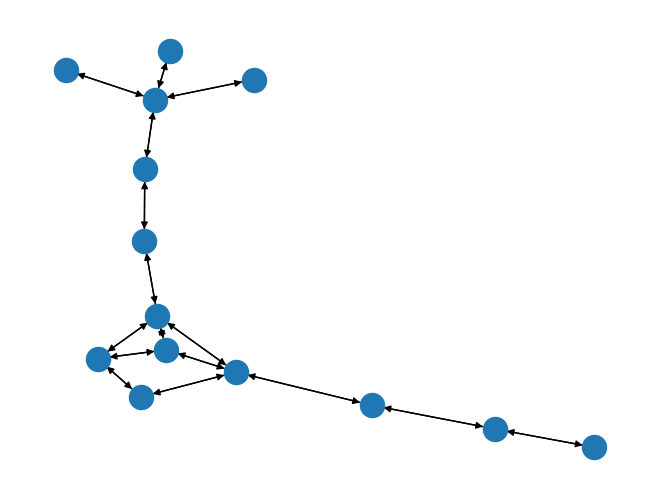

In [89]:
from pyvis.network import Network
import networkx as nx

#G = nx.from_pandas_edgelist(df[df["TokenID"]==100][["From","To","Value"]], source="From",target="To",edge_attr="Value")
got_net = nx.Graph()



sources = got_data['From'].astype('string')
targets = got_data['To'].astype('string')
weights = got_data['Value'].astype('float32')
Hash = got_data['Hash'].astype('string')
edge_data = zip(sources, targets, weights, Hash)
cmp=1
for e in edge_data:
                src = e[0]
                dst = e[1]
                w = e[2]
                h = e[3]

                got_net.add_node(src)
                got_net.add_node(dst)
                got_net.add_edge(src, dst, value=w, title=f"{w} {h}")
                cmp+=1
                


# add neighbor data to node hover data

#net = Network(notebook=True,directed=True)
#net.from_nx(G)
#nx.draw(got_net)
nx.draw(got_net.to_directed(got_net))
sorted(nx.simple_cycles(got_net.to_directed(got_net)))

In [262]:
from pyvis.network import Network
import pandas as pd

got_net = Network(height="1000px", width="100%", bgcolor="#222222", font_color="white", notebook=True,directed=True, select_menu=True)

# set the physics layout of the network
got_net.barnes_hut()
got_data = df[df.TokenID==90]

sources = got_data['From'].astype('string')
targets = got_data['To'].astype('string')
weights = got_data['Value'].astype('float32')
Hash = got_data['Hash'].astype('string')
edge_data = zip(sources, targets, weights, Hash)
cmp=1
for e in edge_data:
                src = e[0]
                dst = e[1]
                w = e[2]
                h = e[3]

                got_net.add_node(src, src, title=src)
                got_net.add_node(dst, dst, title=dst)
                got_net.add_edge(src, dst, value=w, title=f"{w} {h}")
                cmp+=1
                

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
                node["title"] += f" number {cmp} " + "<br>".join(neighbor_map[node["id"]])
                node["value"] = len(neighbor_map[node["id"]])

#print(got_net.edges)

got_net.show("gameofthrones.html")

print(neighbor_map)

gameofthrones.html
{'0x0000000000000000000000000000000000000000': {'0x1212503603aaa0fc26a90f77515d2a51c998866c'}, '0x1212503603aaa0fc26a90f77515d2a51c998866c': {'0x710f89a2bfc1c10102c9bdc66e2c6babc72e3829'}, '0x710f89a2bfc1c10102c9bdc66e2c6babc72e3829': {'0x8a033cd82f4855084d670477fead695f7e2a4a44'}, '0x8a033cd82f4855084d670477fead695f7e2a4a44': {'0x6dcf392147bed5378c0dbc9b66c67692052dd941', '0x3b968d2d299b895a5fcf3bba7a64ad0f566e6f88'}, '0x6dcf392147bed5378c0dbc9b66c67692052dd941': {'0x8a033cd82f4855084d670477fead695f7e2a4a44', '0xca10ceb443a4a3c0c3504377045969093232d7f1'}, '0x3b968d2d299b895a5fcf3bba7a64ad0f566e6f88': {'0x70b97a0da65c15dfb0ffa02aee6fa36e507c2762'}, '0x70b97a0da65c15dfb0ffa02aee6fa36e507c2762': {'0x5f6ac80cdb9e87f3cfa6a90e5140b9a16a361d5c', '0x8a033cd82f4855084d670477fead695f7e2a4a44', '0xca10ceb443a4a3c0c3504377045969093232d7f1'}, '0x5f6ac80cdb9e87f3cfa6a90e5140b9a16a361d5c': {'0x70b97a0da65c15dfb0ffa02aee6fa36e507c2762', '0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24'}

In [92]:
df[df.TokenID==90][["From",'To','Values']]

Index_Transaction                                               Hash  \
94                     30  0x8f009c1667dca2e00a9b859e02c6142a861973691146...   
12723                4748  0x3c37756198375e3e3f76a44cd414ac3afdb8a5fa2489...   
24876               16036  0xc82f25f73be3ca56efd078c2d8559c0289d092b68ad5...   
44090               33428  0x6c374d725996be5eb063f8bdfa30df8e82cdb7a003ce...   
66632               53625  0xb5a79fae2622f69dffa51b9d29901d9213ad0095bba6...   
...                   ...                                                ...   
144160              83973  0xc36b8d65994065e3f4aec2b2d1e04928117869cbe28f...   
148909              85018  0x0b47fe3399932fa2432a708b05453ec44878f464a893...   
148910              85018  0x0b47fe3399932fa2432a708b05453ec44878f464a893...   
148911              85018  0x0b47fe3399932fa2432a708b05453ec44878f464a893...   
148912              85018  0x0b47fe3399932fa2432a708b05453ec44878f464a893...   

           Block                                        From  \
94      12301872  0x0000000000000000000000000000000000000000   
12723   12353354  0x1212503603aaa0fc26a90f77515d2a51c998866c   
24876   12618158  0x710f89a2bfc1c10102c9bdc66e2c6babc72e3829   
44090   13227248  0x8a033cd82f4855084d670477fead695f7e2a4a44   
66632   14624174  0x6dcf392147bed5378c0dbc9b66c67692052dd941   
...          ...                                         ...   
144160  16531693  0xdafce4acc2703a24f29d1321adaadf5768f54642   
148909  16582742  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
148910  16582742  0xdafce4acc2703a24f29d1321adaadf5768f54642   
148911  16582742  0x06a63b6cc5dd0f639d98e0fc1c6153e80d849082   
148912  16582742  0xdafce4acc2703a24f29d1321adaadf5768f54642   

                                                To  TokenID  Value  \
94      0x1212503603aaa0fc26a90f77515d2a51c998866c       90    1.6   
12723   0x710f89a2bfc1c10102c9bdc66e2c6babc72e3829       90    0.5   
24876   0x8a033cd82f4855084d670477fead695f7e2a4a44       90    0.0   
44090   0x6dcf392147bed5378c0dbc9b66c67692052dd941       90    0.0   
66632   0x8a033cd82f4855084d670477fead695f7e2a4a44       90    0.0   
...                                            ...      ...    ...   
144160  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24       90    0.0   
148909  0xdafce4acc2703a24f29d1321adaadf5768f54642       90    0.0   
148910  0x06a63b6cc5dd0f639d98e0fc1c6153e80d849082       90    0.0   
148911  0xdafce4acc2703a24f29d1321adaadf5768f54642       90    0.0   
148912  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24       90    0.0   

                 Value_USD                                       Buyer  \
94      3782.7699257633453  0x1212503603aaa0fc26a90f77515d2a51c998866c   
12723   1472.4584736592528  0x710f89a2bfc1c10102c9bdc66e2c6babc72e3829   
24876                    0  0x8a033cd82f4855084d670477fead695f7e2a4a44   
44090                    0  0x6dcf392147bed5378c0dbc9b66c67692052dd941   
66632                    0  0x8a033cd82f4855084d670477fead695f7e2a4a44   
...                    ...                                         ...   
144160                   0  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
148909                   0  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
148910                   0  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
148911                   0  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
148912                   0  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   

                                            Seller  ...       Price_USD_Ape  \
94      0x0000000000000000000000000000000000000000  ...            No value   
12723   0x1212503603aaa0fc26a90f77515d2a51c998866c  ...            No value   
24876   0x710f89a2bfc1c10102c9bdc66e2c6babc72e3829  ...            No value   
44090   0x8a033cd82f4855084d670477fead695f7e2a4a44  ...            No value   
66632   0x6dcf392147bed5378c0dbc9b66c67692052dd941  ...  13.396587358646839   
...                                            ...  ...                 ..

In [931]:
"""
class Transaction_Token:
    def __init__(self, df, TokenID):
        self.df = df
        self.TokenID = TokenID
        
    def Filter(self):
        df = self.df[self.df.TokenID==self.TokenID]
        return df
    
    def Graph_visualisation(self):
        got_net = Network(height="1000px", width="100%", bgcolor="#222222", font_color="white", notebook=True,directed=True, select_menu=True)

        # set the physics layout of the network
        got_net.barnes_hut()
        got_data = self.Filter()

        #sources = got_data[got_data.TokenID==90].drop_duplicates(subset="Hash").Seller.astype('string')
        #targets = got_data[got_data.TokenID==90].drop_duplicates(subset="Hash").Buyer.astype('string')
        #weights = got_data[got_data.TokenID==90].drop_duplicates(subset="Hash").Value.astype('float32')
        #Hash = got_data[got_data.TokenID==90].drop_duplicates(subset="Hash").Hash.astype('string')
        
        sources = got_data['From'].astype('string')
        targets = got_data['To'].astype('string')
        weights = got_data['Value'].astype('float32')
        Hash = got_data['Hash'].astype('string')
        edge_data = zip(sources, targets, weights, Hash)
        cmp=1
        for e in edge_data:
                        src = e[0]
                        dst = e[1]
                        w = e[2]
                        h = e[3]

                        got_net.add_node(src, src, title=src)
                        got_net.add_node(dst, dst, title=dst)
                        got_net.add_edge(src, dst, value=w, title=f"{w} {h}")
                        cmp+=1
        neighbor_map = got_net.get_adj_list()
        for node in got_net.nodes:
                        node["title"] += f" number {cmp} " + "<br>".join(neighbor_map[node["id"]])
                        node["value"] = len(neighbor_map[node["id"]])
        return got_net.show("gameofthrones.html")
    
    def Graph_Adjency_list(self, results_type):
        got_net = Network(height="1000px", width="100%", bgcolor="#222222", font_color="white", notebook=True,directed=True, select_menu=True)
        got_net.barnes_hut()
        got_data = self.Filter()
        sources = got_data['From'].astype('string')
        targets = got_data['To'].astype('string')
        weights = got_data['Value'].astype('float32')
        Hash = got_data['Hash'].astype('string')
        edge_data = zip(sources, targets, weights, Hash)
        cmp=1
        for e in edge_data:
                        src = e[0]
                        dst = e[1]
                        w = e[2]
                        h = e[3]

                        got_net.add_node(src, src, title=src)
                        got_net.add_node(dst, dst, title=dst)
                        got_net.add_edge(src, dst, value=w, title=f"{w} {h}")
                        cmp+=1
        neighbor_map = got_net.get_adj_list()
        
        matrix = [[0 for j in range(len(neighbor_map.keys()))]
             for i in range(len(neighbor_map.keys()))]

        matrice_Adj = pd.DataFrame(matrix, neighbor_map.keys(), columns = neighbor_map.keys())


        for i in neighbor_map:
            for j in neighbor_map[i]:
                matrice_Adj.at[i,j] += 1
        
        if results_type == "list":
            return matrice_Adj.values
        if results_type == "DataFrame":
            return matrice_Adj
        else:
            return matrice_Adj.values, matrice_Adj
        
    def ExistChemin(self, u, v):
        matrice_Adj = self.Graph_Adjency_list(results_type="list")
        n = len(matrice_Adj) # nombre de sommets
        file = []
        visites = [False] * n
        file.append(u)
        while file:
            courant = file.pop(0)
            visites[courant] = True
            for i in range(n):
                print(file)
                if matrice_Adj[courant][i] > 0 and visites[i] == False:
                    file.append(i)
                    visites[i] = True

                # Si i est un noeud adjacent et égal à v (destination)
                # donc il existe un chemin de u à i
                elif matrice_Adj[courant][i] > 0 and i == v:
                    print(i)
                    return True
        # pas de chemin entre u et v
        return False
    
    
    def Cycle(self):
        matrice_Adj = self.Graph_Adjency_list(results_type="list")
        n = len(matrice_Adj)
        for i in range(n):
            if self.ExistChemin(i, i) == True:
                return True
        return False

        

        

Token = Transaction_Token(df,90)

Token100 = Token.Filter() 

Token.Graph_visualisation()

#Token.Graph_Adjency_list("list")


"""


gameofthrones.html


In [441]:
df[df.TokenID==90][["From","To"]].groupby("From", sort=False).agg(lambda x: list(x))

To
From                                                                                         
0x0000000000000000000000000000000000000000       [0x1212503603aaa0fc26a90f77515d2a51c998866c]
0x1212503603aaa0fc26a90f77515d2a51c998866c       [0x710f89a2bfc1c10102c9bdc66e2c6babc72e3829]
0x710f89a2bfc1c10102c9bdc66e2c6babc72e3829       [0x8a033cd82f4855084d670477fead695f7e2a4a44]
0x8a033cd82f4855084d670477fead695f7e2a4a44  [0x6dcf392147bed5378c0dbc9b66c67692052dd941, 0...
0x6dcf392147bed5378c0dbc9b66c67692052dd941  [0x8a033cd82f4855084d670477fead695f7e2a4a44, 0...
0x3b968d2d299b895a5fcf3bba7a64ad0f566e6f88  [0x70b97a0da65c15dfb0ffa02aee6fa36e507c2762, 0...
0x70b97a0da65c15dfb0ffa02aee6fa36e507c2762  [0x5f6ac80cdb9e87f3cfa6a90e5140b9a16a361d5c, 0...
0x5f6ac80cdb9e87f3cfa6a90e5140b9a16a361d5c  [0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24, 0...
0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24  [0x5f6ac80cdb9e87f3cfa6a90e5140b9a16a361d5c, 0...
0xca10ceb443a4a3c0c3504377045969093232d7f1  [0x3b968d2d299b895a5fcf3bba7a64ad0f566e6f88, 0...
0xdafce4acc2703a24f29d1321adaadf5768f54642  [0xc95835e09e8c11ddfc3f6d903c6aac5ebb4c6d79, 0...
0xc95835e09e8c11ddfc3f6d903c6aac5ebb4c6d79  [0xdafce4acc2703a24f29d1321adaadf5768f54642, 0...
0x148cc5d83aa1a64dc8769f8cdf08866784ae3877  [0xdafce4acc2703a24f29d1321adaadf5768f54642, 0...
0x06a63b6cc5dd0f639d98e0fc1c6153e80d849082  [0xdafce4acc2703a24f29d1321adaadf5768f54642, 0...

In [627]:
L=[]
for i in range(len(df[df.TokenID==90].From.values)):
    L_temp = []
    L_temp.append(df[df.TokenID==90].From.values[i])
    for j in df[df.TokenID==90].From.values[i+1:]:
        L_temp.append(j)
        if j == df[df.TokenID==90].From.values[i]:
            L_temp = L_temp
            L.append(L_temp.copy())
            #L_temp.clear()
                
L

            
            
    
            

[['0x8a033cd82f4855084d670477fead695f7e2a4a44',
  '0x6dcf392147bed5378c0dbc9b66c67692052dd941',
  '0x8a033cd82f4855084d670477fead695f7e2a4a44'],
 ['0x8a033cd82f4855084d670477fead695f7e2a4a44',
  '0x6dcf392147bed5378c0dbc9b66c67692052dd941',
  '0x8a033cd82f4855084d670477fead695f7e2a4a44',
  '0x3b968d2d299b895a5fcf3bba7a64ad0f566e6f88',
  '0x70b97a0da65c15dfb0ffa02aee6fa36e507c2762',
  '0x5f6ac80cdb9e87f3cfa6a90e5140b9a16a361d5c',
  '0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24',
  '0x5f6ac80cdb9e87f3cfa6a90e5140b9a16a361d5c',
  '0x70b97a0da65c15dfb0ffa02aee6fa36e507c2762',
  '0x8a033cd82f4855084d670477fead695f7e2a4a44'],
 ['0x8a033cd82f4855084d670477fead695f7e2a4a44',
  '0x6dcf392147bed5378c0dbc9b66c67692052dd941',
  '0x8a033cd82f4855084d670477fead695f7e2a4a44',
  '0x3b968d2d299b895a5fcf3bba7a64ad0f566e6f88',
  '0x70b97a0da65c15dfb0ffa02aee6fa36e507c2762',
  '0x5f6ac80cdb9e87f3cfa6a90e5140b9a16a361d5c',
  '0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24',
  '0x5f6ac80cdb9e87f3cfa6a90e5140b9a16

In [678]:
df[df.TokenID==90].drop_duplicates(subset="Hash").head(10)

Index_Transaction                                               Hash  \
94                    30  0x8f009c1667dca2e00a9b859e02c6142a861973691146...   
12723               4748  0x3c37756198375e3e3f76a44cd414ac3afdb8a5fa2489...   
24876              16036  0xc82f25f73be3ca56efd078c2d8559c0289d092b68ad5...   
44090              33428  0x6c374d725996be5eb063f8bdfa30df8e82cdb7a003ce...   
66632              53625  0xb5a79fae2622f69dffa51b9d29901d9213ad0095bba6...   
70982              56302  0x01827b624e746aac3999f32505bf82eba8bd737defc4...   
78686              61492  0x8300dc4568461de47d3d7598f421fa0653c5ff4c1350...   
78709              61495  0xa4dbe2bb6e409910b6e94bd1fcb4a7fd416dafa84dfe...   
82156              63300  0x63b994bfc951aa862743600419f9b4475ef9246fc4b2...   
82370              63439  0x1043501043a6a0687c393af0e7ded36a5710ea7cd98c...   

          Block                                        From  \
94     12301872  0x0000000000000000000000000000000000000000   
12723  12353354  0x1212503603aaa0fc26a90f77515d2a51c998866c   
24876  12618158  0x710f89a2bfc1c10102c9bdc66e2c6babc72e3829   
44090  13227248  0x8a033cd82f4855084d670477fead695f7e2a4a44   
66632  14624174  0x6dcf392147bed5378c0dbc9b66c67692052dd941   
70982  14720340  0x8a033cd82f4855084d670477fead695f7e2a4a44   
78686  15129426  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
78709  15129594  0x8a033cd82f4855084d670477fead695f7e2a4a44   
82156  15386776  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
82370  15397763  0x8a033cd82f4855084d670477fead695f7e2a4a44   

                                               To  TokenID       Value  \
94     0x1212503603aaa0fc26a90f77515d2a51c998866c       90    1.600000   
12723  0x710f89a2bfc1c10102c9bdc66e2c6babc72e3829       90    0.500000   
24876  0x8a033cd82f4855084d670477fead695f7e2a4a44       90    0.000000   
44090  0x6dcf392147bed5378c0dbc9b66c67692052dd941       90    0.000000   
66632  0x8a033cd82f4855084d670477fead695f7e2a4a44       90    0.000000   
70982  0x3b968d2d299b895a5fcf3bba7a64ad0f566e6f88       90   32.000000   
78686  0x5f6ac80cdb9e87f3cfa6a90e5140b9a16a361d5c       90  204.301222   
78709  0x3b968d2d299b895a5fcf3bba7a64ad0f566e6f88       90  195.961000   
82156  0x5f6ac80cdb9e87f3cfa6a90e5140b9a16a361d5c       90  460.339869   
82370  0x6dcf392147bed5378c0dbc9b66c67692052dd941       90    0.000000   

                Value_USD                                       Buyer  \
94     3782.7699257633453  0x1212503603aaa0fc26a90f77515d2a51c998866c   
12723  1472.4584736592528  0x710f89a2bfc1c10102c9bdc66e2c6babc72e3829   
24876                   0  0x8a033cd82f4855084d670477fead695f7e2a4a44   
44090                   0  0x6dcf392147bed5378c0dbc9b66c67692052dd941   
66632                   0  0x8a033cd82f4855084d670477fead695f7e2a4a44   
70982   88125.97012949402  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
78686  224210.26141524484  0x8a033cd82f4855084d670477fead695f7e2a4a44   
78709  215057.28932927095  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
82156   727068.0267276302  0x8a033cd82f4855084d670477fead695f7e2a4a44   
82370                   0  0x6dcf392147bed5378c0dbc9b66c67692052dd941   

                                           Seller  ...       Price_USD_Ape  \
94     0x0000000000000000000000000000000000000000  ...            No value   
12723  0x1212503603aaa0fc26a90f77515d2a51c998866c  ...            No value   
24876  0x710f89a2bfc1c10102c9bdc66e2c6babc72e3829  ...            No value   
44090  0x8a033cd82f4855084d670477fead695f7e2a4a44  ...            No value   
66632  0x6dcf392147bed5378c0dbc9b66c67692052dd941  ...  13.396587358646839   
70982  0x8a033cd82f4855084d670477fead695f7e2a4a44  ...  13.757914799387576   
78686  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24  ...   4.342205569999804   
78709  0x8a033cd82f4855084d670477fead695f7e2a4a44  ...   4.342205569999804   
82156  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24  ...  5.0379929828103105   
82370  0x8a033cd82f4855084d670477fead695f7e2

In [685]:
df[df.TokenID==90].drop_duplicates(subset="Hash")[["Seller","Buyer","Type"]][df["Type"]!="Staking"]

/var/folders/s8/m6kqd0hs2hq505ml3ydqxqd40000gn/T/ipykernel_79892/2400933176.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.TokenID==90].drop_duplicates(subset="Hash")[["Seller","Buyer","Type"]][df["Type"].copy()!="Staking"]


Seller  \
94      0x0000000000000000000000000000000000000000   
12723   0x1212503603aaa0fc26a90f77515d2a51c998866c   
24876   0x710f89a2bfc1c10102c9bdc66e2c6babc72e3829   
44090   0x8a033cd82f4855084d670477fead695f7e2a4a44   
66632   0x6dcf392147bed5378c0dbc9b66c67692052dd941   
70982   0x8a033cd82f4855084d670477fead695f7e2a4a44   
78686   0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
78709   0x8a033cd82f4855084d670477fead695f7e2a4a44   
82156   0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
82370   0x8a033cd82f4855084d670477fead695f7e2a4a44   
82974   0x6dcf392147bed5378c0dbc9b66c67692052dd941   
83066   0xca10ceb443a4a3c0c3504377045969093232d7f1   
137341  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
137357  0xca10ceb443a4a3c0c3504377045969093232d7f1   

                                             Buyer              Type  
94      0x1212503603aaa0fc26a90f77515d2a51c998866c              Mint  
12723   0x710f89a2bfc1c10102c9bdc66e2c6babc72e3829              Sale  
24876   0x8a033cd82f4855084d670477fead695f7e2a4a44         Transfert  
44090   0x6dcf392147bed5378c0dbc9b66c67692052dd941         Transfert  
66632   0x8a033cd82f4855084d670477fead695f7e2a4a44         Transfert  
70982   0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24  transfert / Swap  
78686   0x8a033cd82f4855084d670477fead695f7e2a4a44  transfert / Swap  
78709   0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24  transfert / Swap  
82156   0x8a033cd82f4855084d670477fead695f7e2a4a44  transfert / Swap  
82370   0x6dcf392147bed5378c0dbc9b66c67692052dd941         Transfert  
82974   0xca10ceb443a4a3c0c3504377045969093232d7f1         Transfert  
83066   0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24  transfert / Swap  
137341  0xca10ceb443a4a3c0c3504377045969093232d7f1  transfert / Swap  
137357  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24  transfert / Swap

In [716]:
# Définir les listes d'envoyeurs et de receveurs pour les transactions
senders = df[df.TokenID==90].drop_duplicates(subset="Hash")[df["Type"]!="Staking"].Seller.values
receivers = df[df.TokenID==90].drop_duplicates(subset="Hash")[df["Type"]!="Staking"].Buyer.values
values_df = df[df.TokenID==90].drop_duplicates(subset="Hash")[df["Type"]!="Staking"].Value.values

# Créer une liste vide pour stocker les cycles détectés
cycles = []
values = []
index = []

# Parcourir chaque transaction
for i in range(len(senders)):
    sender = senders[i]
    receiver = receivers[i]
    
    # Vérifier si le receveur est également un envoyeur dans une transaction précédente
    for j in range(i):
        if receiver == senders[j]:
            #print(receiver)
            # Si un cycle est détecté, ajouter la transaction à la liste des cycles
            cycle = [senders[j]]
            #cycle = []
            value = [values_df[i]]
            for k in range(j, i):
                #cycle.append(senders[k])
                cycle.append(receivers[k])
                cycle.append(senders[k])
                value.append(values_df[k])
            cycles.append(cycle)
            values.append(value)
            break

# Afficher tous les cycles détectés
if not cycles:
    print("Il n'y a pas de cycle dans les transactions.")
else:
    print("Les cycles suivants ont été détectés :")
    for cycle, value in zip(cycles,values):
        print(cycle, value)


Les cycles suivants ont été détectés :
['0x8a033cd82f4855084d670477fead695f7e2a4a44', '0x6dcf392147bed5378c0dbc9b66c67692052dd941', '0x8a033cd82f4855084d670477fead695f7e2a4a44'] [0.0, 0.0]
['0x8a033cd82f4855084d670477fead695f7e2a4a44', '0x6dcf392147bed5378c0dbc9b66c67692052dd941', '0x8a033cd82f4855084d670477fead695f7e2a4a44', '0x8a033cd82f4855084d670477fead695f7e2a4a44', '0x6dcf392147bed5378c0dbc9b66c67692052dd941', '0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24', '0x8a033cd82f4855084d670477fead695f7e2a4a44'] [204.3012221265485, 0.0, 0.0, 32.0]
['0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24', '0x8a033cd82f4855084d670477fead695f7e2a4a44', '0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24'] [195.961, 204.3012221265485]
['0x8a033cd82f4855084d670477fead695f7e2a4a44', '0x6dcf392147bed5378c0dbc9b66c67692052dd941', '0x8a033cd82f4855084d670477fead695f7e2a4a44', '0x8a033cd82f4855084d670477fead695f7e2a4a44', '0x6dcf392147bed5378c0dbc9b66c67692052dd941', '0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24', '0x8a03

/var/folders/s8/m6kqd0hs2hq505ml3ydqxqd40000gn/T/ipykernel_79892/431004158.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  senders = df[df.TokenID==90].drop_duplicates(subset="Hash")[df["Type"]!="Staking"].Seller.values
/var/folders/s8/m6kqd0hs2hq505ml3ydqxqd40000gn/T/ipykernel_79892/431004158.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  receivers = df[df.TokenID==90].drop_duplicates(subset="Hash")[df["Type"]!="Staking"].Buyer.values
/var/folders/s8/m6kqd0hs2hq505ml3ydqxqd40000gn/T/ipykernel_79892/431004158.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values_df = df[df.TokenID==90].drop_duplicates(subset="Hash")[df["Type"]!="Staking"].Value.values


In [924]:
# Définir les listes d'envoyeurs et de receveurs pour les transactions
senders = df[df.TokenID==100].drop_duplicates(subset="Hash").loc[df["Type"]!="Staking"].Seller.values
receivers = df[df.TokenID==100].drop_duplicates(subset="Hash").loc[df["Type"]!="Staking"].Buyer.values
#values_df = df[df.TokenID==1000].drop_duplicates(subset="Hash").loc[df["Type"]!="Staking"].Value_USD.values
values_df = df[df.TokenID==100].drop_duplicates(subset="Hash").loc[df["Type"]!="Staking"].Value.values

# Créer une liste vide pour stocker les cycles détectés
cycles = []
values = []
index = []

# Parcourir chaque transaction
for i in range(len(senders)):
    sender = senders[i]
    receiver = receivers[i]
    
    # Vérifier si l'envoyeur est aussi un receveur
    for j in range(i, len(senders)):
        if sender == receivers[j]:
            #print(receiver)
            # Si un cycle est détecté, ajouter la transaction à la liste des cycles
            cycle = [sender]
            #cycle = []
            value = [values_df[i]]
            for k in range(i, j):
                #print(k)
                #cycle.append(senders[k])
                cycle.append(receivers[k])
                #cycle.append(senders[k])
                value.append(values_df[k])
            cycle.append(receivers[j])
            cycles.append(cycle)
            values.append(value)
            break

# Afficher tous les cycles détectés
if not cycles:
    print("Il n'y a pas de cycle dans les transactions.")
else:
    print("Les cycles suivants ont été détectés :")
    cmp=0
    df_graph_cycle = {"TokenID":1000}
    
    for cycle, value in zip(cycles,values):
        print(cycle, value)
        df_graph_cycle[f"cycle_{cmp}"] = []
        for i in range(len(cycle)-1):
            c = []
            c.append(cycle[i])
            c.append(cycle[i+1])
            
            df_graph_cycle[f"cycle_{cmp}"].append({f"transaction_{cmp}":c, "value":value[i]})
        cmp+=1
        
        


        # set the physics layout of the network
        

            


Les cycles suivants ont été détectés :
['0xc67db0df922238979da0fd00d46016e8ae14cecb', '0x619866736a3a101f65cff3a8c3d2602fc54fd749', '0xc67db0df922238979da0fd00d46016e8ae14cecb'] [0.0, 0.0]
['0x6e353e91cb721fda5b3131ac40d945f7775c95e7', '0xdb5485c85bd95f38f9def0ca85499ef67dc581c0', '0x6e353e91cb721fda5b3131ac40d945f7775c95e7'] [0.0, 0.0]


In [882]:
df_graph_cycle

{'TokenID': 1000,
 'cycle_0': [{'transaction_0': ['0x9ad85d7c0f7eff3d0718c3a3a032557558f7048b',
    '0xcfbecd1ba28af429c4063e33901f8c0bd53ec9f1'],
   'value': 0.0},
  {'transaction_0': ['0xcfbecd1ba28af429c4063e33901f8c0bd53ec9f1',
    '0x8bbc693d042cea740e4ff01d7e0efb36110c36bf'],
   'value': 0.0},
  {'transaction_0': ['0x8bbc693d042cea740e4ff01d7e0efb36110c36bf',
    '0x9ad85d7c0f7eff3d0718c3a3a032557558f7048b'],
   'value': 0.0}],
 'cycle_1': [{'transaction_1': ['0x8bbc693d042cea740e4ff01d7e0efb36110c36bf',
    '0x9ad85d7c0f7eff3d0718c3a3a032557558f7048b'],
   'value': 0.0},
  {'transaction_1': ['0x9ad85d7c0f7eff3d0718c3a3a032557558f7048b',
    '0x8bbc693d042cea740e4ff01d7e0efb36110c36bf'],
   'value': 0.0}],
 'cycle_2': [{'transaction_2': ['0x5ceff23a72431c69fb7f0e035d98b02fd27441b5',
    '0x68761de35422d8e36d18dc2f7f6313a58c1a3616'],
   'value': 0.0},
  {'transaction_2': ['0x68761de35422d8e36d18dc2f7f6313a58c1a3616',
    '0x5ceff23a72431c69fb7f0e035d98b02fd27441b5'],
   'value': 0

In [ ]:
# Définir les listes d'envoyeurs et de receveurs pour les transactions
import tqdm
from tqdm.notebook import trange, tqdm
liste_key = []
df_graph_cycle_list = []
for Token_ID in trange(min(df.TokenID.values), max(df.TokenID.values)+1):
    senders = df[df.TokenID==Token_ID].drop_duplicates(subset="Hash").loc[df["Type"]!="Staking"].Seller.values
    receivers = df[df.TokenID==Token_ID].drop_duplicates(subset="Hash").loc[df["Type"]!="Staking"].Buyer.values
    #values_df = df[df.TokenID==1000].drop_duplicates(subset="Hash").loc[df["Type"]!="Staking"].Value_USD.values
    values_df = df[df.TokenID==Token_ID].drop_duplicates(subset="Hash").loc[df["Type"]!="Staking"].Value.values

    # Créer une liste vide pour stocker les cycles détectés
    cycles = []
    values = []
    index = []

    # Parcourir chaque transaction
    for i in range(len(senders)):
        sender = senders[i]
        receiver = receivers[i]

        # Vérifier si l'envoyeur est aussi un receveur
        for j in range(i, len(senders)):
            if sender == receivers[j]:
                #print(receiver)
                # Si un cycle est détecté, ajouter la transaction à la liste des cycles
                cycle = [sender]
                #cycle = []
                value = [values_df[i]]
                for k in range(i, j):
                    #print(k)
                    #cycle.append(senders[k])
                    cycle.append(receivers[k])
                    #cycle.append(senders[k])
                    value.append(values_df[k])
                cycle.append(receivers[j])
                cycles.append(cycle)
                values.append(value)
                break

    # Afficher tous les cycles détectés
    #if not cycles:
        #print("Il n'y a pas de cycle dans les transactions.")
        #pass
    if cycles:
        #print("Les cycles suivants ont été détectés :")
        
        cmp=0
        
        #df_graph_cycle = {"TokenID":id}
        df_graph_cycle = {}
        for cycle, value in zip(cycles,values):
            #print(cycle, value)
            df_graph_cycle[f"cycle_{cmp}"] = []
            a=0
            for i in range(len(cycle)-1):
                c = []
                c.append(cycle[i])
                c.append(cycle[i+1])

                df_graph_cycle[f"cycle_{cmp}"].append({f"transaction_{a}":c, "value":value[i]})
                a+=1
            cmp+=1
            
        df_graph_cycle_list.append(df_graph_cycle)
        
        liste_key.append(Token_ID)
    
    
D = dict(zip(liste_key, df_graph_cycle_list))

D
        


        # set the physics layout of the network
        

            


In [78]:
df.iloc[-1]

Index_Transaction                                                            85318
Hash                             0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...
Block                                                                     16600722
From                                    0xdafce4acc2703a24f29d1321adaadf5768f54642
To                                      0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24
TokenID                                                                       8073
Value                                                                          0.0
Value_USD                                                                        0
Buyer                                   0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24
Seller                                  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24
Date                                                           2023-02-10 20:23:35
Price_USD_ETH                                                          1546.383769
Pric

In [79]:
df

Index_Transaction                                               Hash  \
0                       0  0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...   
1                       0  0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...   
2                       0  0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...   
3                       0  0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...   
4                       0  0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...   
...                   ...                                                ...   
150525              85318  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...   
150526              85318  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...   
150527              85318  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...   
150528              85318  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...   
150529              85318  0x356b456f2d478b217752ae27c3a4605d5d0723c26f18...   

           Block                                        From  \
0       12292922  0x0000000000000000000000000000000000000000   
1       12292922  0x0000000000000000000000000000000000000000   
2       12292922  0x0000000000000000000000000000000000000000   
3       12292922  0x0000000000000000000000000000000000000000   
4       12292922  0x0000000000000000000000000000000000000000   
...          ...                                         ...   
150525  16600722  0xdafce4acc2703a24f29d1321adaadf5768f54642   
150526  16600722  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150527  16600722  0xdafce4acc2703a24f29d1321adaadf5768f54642   
150528  16600722  0x99b019edc78ec72893fabc6667672b2fefa9cc44   
150529  16600722  0xdafce4acc2703a24f29d1321adaadf5768f54642   

                                                To  TokenID  Value Value_USD  \
0       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        0    0.0         0   
1       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        1    0.0         0   
2       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        2    0.0         0   
3       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        3    0.0         0   
4       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        4    0.0         0   
...                                            ...      ...    ...       ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24     2281    0.0         0   
150526  0xdafce4acc2703a24f29d1321adaadf5768f54642     8073    0.0         0   
150527  0x99b019edc78ec72893fabc6667672b2fefa9cc44     8073    0.0         0   
150528  0xdafce4acc2703a24f29d1321adaadf5768f54642     8073    0.0         0   
150529  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24     8073    0.0         0   

                                             Buyer  \
0       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
1       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
2       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
3       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
4       0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
...                                            ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150526  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150527  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150528  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   
150529  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   

                                            Seller  ...      Price_USD_Ape  \
0       0x0000000000000000000000000000000000000000  ...           No value   
1       0x0000000000000000000000000000000000000000  ...           No value   
2       0x0000000000000000000000000000000000000000  ...           No value   
3       0x0000000000000000000000000000000000000000  ...           No value   
4       0x0000000000000000000000000000000000000000  ...           No value   
...                                            ...  ...                ...   
150525  0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24  ...  5.056518666131768   
150526  0xdbfd76af2157dc15ee4e57f3f942bb45ba

In [75]:
df[df.TokenID==6]

Index_Transaction                                               Hash  \
6                      0  0xcfb197f62ec5c7f0e71a11ec0c4a0e394a3aa41db538...   
12379               4416  0x007cbf5c3c7cb5186df38529f143c037eb9234920316...   
28241              19252  0xc0d7e1603189da28dee355e7f52e0c7424f03cdc1288...   
52872              41248  0x4e18af9d2a3e3d3669eca2dd983de00a7e07fef38ec1...   
52873              41249  0xf0b8b958a6d90f62c2915ddd0d084eba9d7afc455629...   
52874              41250  0xd3366e50c18fdf3dc5050310c913c882ba3e5c406394...   
52876              41251  0x38ce9d7c686e30fb0f90e36c77806b28e947a4cb1d3d...   
77574              60784  0xf2282395fb8d509e596fc26b0cc9fa3cc29415f41424...   

          Block                                        From  \
6      12292922  0x0000000000000000000000000000000000000000   
12379  12351891  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
28241  12678560  0x898c4607809945b49d65ea51580101798931b241   
52872  13856815  0xf52393e120f918ffba50410b90a29b1f8250c879   
52873  13856842  0x2c2ed4b3876c442fee80bee76ce0ee2ca2a512af   
52874  13856860  0xc310e760778ecbca4c65b6c559874757a4c4ece0   
52876  13856865  0x5cb68cd0d285a907b927a7db534d89718addfd86   
77574  15070702  0x465092bbe4ca9675c1cf9c7bf2620b2eefc77e25   

                                               To  TokenID   Value  \
6      0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03        6   0.000   
12379  0x898c4607809945b49d65ea51580101798931b241        6   0.000   
28241  0xf52393e120f918ffba50410b90a29b1f8250c879        6  10.000   
52872  0x2c2ed4b3876c442fee80bee76ce0ee2ca2a512af        6  63.000   
52873  0xc310e760778ecbca4c65b6c559874757a4c4ece0        6  15.005   
52874  0x5cb68cd0d285a907b927a7db534d89718addfd86        6   0.005   
52876  0x465092bbe4ca9675c1cf9c7bf2620b2eefc77e25        6   0.000   
77574  0x820425d330f777370acf68e45f884547e98db2c0        6  93.450   

                Value_USD                                       Buyer  \
6                       0  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03   
12379                   0  0x898c4607809945b49d65ea51580101798931b241   
28241  22515.605593660406  0xf52393e120f918ffba50410b90a29b1f8250c879   
52872  254302.63222224594  0x2c2ed4b3876c442fee80bee76ce0ee2ca2a512af   
52873   60568.42851579049  0xc310e760778ecbca4c65b6c559874757a4c4ece0   
52874   20.18274858906714  0x2c2ed4b3876c442fee80bee76ce0ee2ca2a512af   
52876                   0  0x465092bbe4ca9675c1cf9c7bf2620b2eefc77e25   
77574            No Value  0x820425d330f777370acf68e45f884547e98db2c0   

                                           Seller  ...      Price_USD_Ape  \
6      0x0000000000000000000000000000000000000000  ...           No value   
12379  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03  ...           No value   
28241  0x898c4607809945b49d65ea51580101798931b241  ...           No value   
52872  0xf52393e120f918ffba50410b90a29b1f8250c879  ...           No value   
52873  0x2c2ed4b3876c442fee80bee76ce0ee2ca2a512af  ...           No value   
52874  0xc310e760778ecbca4c65b6c559874757a4c4ece0  ...           No value   
52876  0x5cb68cd0d285a907b927a7db534d89718addfd86  ...           No value   
77574  0x465092bbe4ca9675c1cf9c7bf2620b2eefc77e25  ...  4.520947328914282   

       Currency             Marketplace       Type  \
6           ETH                    BAYC       Mint   
12379       ETH                    BAYC  Transfert   
28241       ETH                 Opensea       Sale   
52872       ETH                 Opensea       Sale   
52873       ETH  NFT Trader: Batch Swap       Sale   
52874       ETH  NFT Trader: Batch Swap       Sale   
52876       ETH                    BAYC  Transfert   
77574      WETH                 Opensea       Sale   

                    Possible_Contract_Interaction      Contract_Name Day  \
6                                 Already_defined            No Name  22   
12379  0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D  BoredApeYachtClub   2   
28241                        

In [88]:
First_sender = df.drop_duplicates(subset=["Hash","TokenID"])[["Hash","TokenID","From"]].rename(columns={"From" : "First_Sender"})

In [96]:
Last_Sender = df.drop_duplicates(subset=["Hash","TokenID"],keep="last")[["Hash","TokenID","To"]].rename(columns={"To" : "Last_Receiver"})

In [97]:
First_Last = pd.merge(First_sender,Last_Sender, on=["Hash","TokenID"])

In [98]:
df_modified = pd.merge(df, First_Last,on=["Hash","TokenID"])

In [101]:
df_modified[df_modified.TokenID==100]

Index_Transaction                                               Hash  \
104                    38  0xdac7216a750000483311e4e788ceb1c44e28dda62a00...   
45042               34222  0xe0f42ebe2170dd77e63801a63db33de00fc555cff2f3...   
45044               34224  0x1bf24260f420118a05af875f2dea823b922629124fee...   
53428               41702  0x68e004e44ce57977b0d4f6e8aa91762e7d1f0ce65294...   
68808               55014  0xadd84a38593b5449b7d3713b085388c80ff4a6b8ae15...   
70851               56218  0xb32bbf1b1192b78b07eb6dcaa960e13c863c6c816acc...   
71072               56351  0xd4e01f73cf710c8f51d0b51c692496cc68536a5f0548...   
75058               59247  0x72adb059aa6f3c7cc29e23c64f1d47da0cb35e8307f9...   
97664               71611  0x01fbe7ccd507b705e4fd3ee200f6b6165fde61d23e8a...   
97675               71616  0x29dd27c4d54d93a7ea992beddafb3d07853b17144f28...   
97676               71617  0x3da5e368606ec891ad2fd0780e16c7ea17277528e33e...   
98278               71868  0xaf27d72ec4723a2b88c7bdd931c68d14bad7663e4725...   
124985              79153  0xe4894ba97472345375d64eef187224cbc9e1ba5615fc...   
125206              79205  0xa155c884db32a4a701dfa313bea631d8e022b2fde26f...   
125208              79207  0x284128bb0984cd5909d6b210d3c61a1e088345aa3b23...   
131973              80916  0xd1629d941e1b1d3aad7d018a351c27aea93d651c635b...   

           Block                                        From  \
104     12302356  0x0000000000000000000000000000000000000000   
45042   13284443  0x35f0686c63f50707ea3b5bace186938e4e19f03a   
45044   13284527  0xaa2b5756e708dd5db4b7ef204f6e9ce54e8d4734   
53428   13893263  0x5c8ab5777d280f7a431d775d7df37e5b4b584819   
68808   14689539  0xfdd766042d95a47800d500f71e0f55267c783f50   
70851   14715820  0xfd2de01071195cbd297b1dc3f5ee3d1eee7e2fc3   
71072   14722874  0x400776e431ac91301263d9011907c594ae2c3c7a   
75058   14930766  0x50faff505981949e2bab7ae447a9e5dbf0ec3a92   
97664   16169044  0xf4c7ccb6b9712fbbe95d6b13bc2af49b0c3ba87b   
97675   16169088  0x6a9034aadfb6edf5a0e331f1c4793616da49f856   
97676   16169099  0xdd0dadbd18c01edd029e646a84c2cdff52f72a2e   
98278   16172141  0xc67db0df922238979da0fd00d46016e8ae14cecb   
124985  16402933  0x619866736a3a101f65cff3a8c3d2602fc54fd749   
125206  16404365  0xc67db0df922238979da0fd00d46016e8ae14cecb   
125208  16404391  0x6e353e91cb721fda5b3131ac40d945f7775c95e7   
131973  16437551  0xdb5485c85bd95f38f9def0ca85499ef67dc581c0   

                                                To  TokenID   Value  \
104     0x35f0686c63f50707ea3b5bace186938e4e19f03a      100    0.40   
45042   0xaa2b5756e708dd5db4b7ef204f6e9ce54e8d4734      100   41.14   
45044   0x5c8ab5777d280f7a431d775d7df37e5b4b584819      100    0.00   
53428   0xfdd766042d95a47800d500f71e0f55267c783f50      100   70.00   
68808   0xfd2de01071195cbd297b1dc3f5ee3d1eee7e2fc3      100  180.00   
70851   0x400776e431ac91301263d9011907c594ae2c3c7a      100  120.00   
71072   0x50faff505981949e2bab7ae447a9e5dbf0ec3a92      100    0.00   
75058   0xf4c7ccb6b9712fbbe95d6b13bc2af49b0c3ba87b      100    0.00   
97664   0x6a9034aadfb6edf5a0e331f1c4793616da49f856      100    0.00   
97675   0xdd0dadbd18c01edd029e646a84c2cdff52f72a2e      100    0.00   
97676   0xc67db0df922238979da0fd00d46016e8ae14cecb      100    0.00   
98278   0x619866736a3a101f65cff3a8c3d2602fc54fd749      100    0.00   
124985  0xc67db0df922238979da0fd00d46016e8ae14cecb      100    0.00   
125206  0x6e353e91cb721fda5b3131ac40d945f7775c95e7      100    0.00   
125208  0xdb5485c85bd95f38f9def0ca85499ef67dc581c0      100    0.00   
131973  0x6e353e91cb721fda5b3131ac40d945f7775c95e7      100    0.00   

                 Value_USD                                       Buyer  \
104      945.6924814408363  0x35f0686c63f50707ea3b5bace186938e4e19f03a   
45042    126469.2869776532  0xaa2b5756e708dd5db4b7ef204f6e9ce54e8d4734   
45044                    0  0x5c8ab5777d280f7a431d775d7df37e5b4b584819   
53428   283153.59450835286  0xfdd766042d95a47800d500f7

In [102]:
df_modified = df_modified.drop(["Buyer", "Seller"], axis=1)

In [332]:
df_modified.to_csv("BAYC_Modified.csv", index=False)

In [109]:
# Définir les listes d'envoyeurs et de receveurs pour les transactions
import tqdm
from tqdm.notebook import trange, tqdm
liste_key = []
df_graph_cycle_list = []
df = df_modified.copy()
for Token_ID in trange(min(df.TokenID.values), max(df.TokenID.values)+1):
    senders = df[df.TokenID==Token_ID].drop_duplicates(subset=["Hash","TokenID"]).loc[df["Type"]!="Staking"].First_Sender.values
    receivers = df[df.TokenID==Token_ID].drop_duplicates(subset=["Hash","TokenID"]).loc[df["Type"]!="Staking"].Last_Receiver.values
    #values_df = df[df.TokenID==1000].drop_duplicates(subset="Hash").loc[df["Type"]!="Staking"].Value_USD.values
    values_df = df[df.TokenID==Token_ID].drop_duplicates(subset=["Hash","TokenID"]).loc[df["Type"]!="Staking"].Value.values

    # Créer une liste vide pour stocker les cycles détectés
    cycles = []
    values = []
    index = []

    # Parcourir chaque transaction
    for i in range(len(senders)):
        sender = senders[i]
        receiver = receivers[i]

        # Vérifier si l'envoyeur est aussi un receveur
        for j in range(i, len(senders)):
            if sender == receivers[j]:
                #print(receiver)
                # Si un cycle est détecté, ajouter la transaction à la liste des cycles
                cycle = [sender]
                #cycle = []
                value = [values_df[i]]
                for k in range(i, j):
                    #print(k)
                    #cycle.append(senders[k])
                    cycle.append(receivers[k])
                    #cycle.append(senders[k])
                    value.append(values_df[k])
                cycle.append(receivers[j])
                cycles.append(cycle)
                values.append(value)
                break

    # Afficher tous les cycles détectés
    #if not cycles:
        #print("Il n'y a pas de cycle dans les transactions.")
        #pass
    if cycles:
        #print("Les cycles suivants ont été détectés :")
        
        cmp=0
        
        #df_graph_cycle = {"TokenID":id}
        df_graph_cycle = {}
        for cycle, value in zip(cycles,values):
            #print(cycle, value)
            #df_graph_cycle[f"cycle_{cmp}"] = []
            df_graph_cycle[f"Cycle_{cmp}"] = {}
            a=0
            for i in range(len(cycle)-1):
                c = []
                c.append(cycle[i])
                c.append(cycle[i+1])

                #df_graph_cycle[f"cycle_{cmp}"].append({f"transaction_{a}":c, "value":value[i]})
                #df_graph_cycle[f"cycle_{cmp}"] = {}
                df_graph_cycle[f"Cycle_{cmp}"][f"Transaction_{a}"] = {}
                df_graph_cycle[f"Cycle_{cmp}"][f"Transaction_{a}"]["Sender"] = c[0]
                df_graph_cycle[f"Cycle_{cmp}"][f"Transaction_{a}"]["Receiver"] = c[1]
              
                
                df_graph_cycle[f"Cycle_{cmp}"][f"Transaction_{a}"]["Value"] = value[i]

                a+=1
            cmp+=1
            
        df_graph_cycle_list.append(df_graph_cycle)
        
        liste_key.append(f"TokenID_{Token_ID}")
    
D = dict(zip(liste_key, df_graph_cycle_list))

D
        


        # set the physics layout of the network
        

            


  0%|          | 0/10000 [00:00<?, ?it/s]

{'TokenID_8': {'Cycle_0': {'Transaction_0': {'Sender': '0x357931791284f40765b462aa7ad217ebf82920cb',
    'Receiver': '0x5cbc5413637343eaab0784522c95b4686f5e96fd',
    'Value': 0.0},
   'Transaction_1': {'Sender': '0x5cbc5413637343eaab0784522c95b4686f5e96fd',
    'Receiver': '0x357931791284f40765b462aa7ad217ebf82920cb',
    'Value': 0.0}},
  'Cycle_1': {'Transaction_0': {'Sender': '0x5cbc5413637343eaab0784522c95b4686f5e96fd',
    'Receiver': '0x357931791284f40765b462aa7ad217ebf82920cb',
    'Value': 0.0},
   'Transaction_1': {'Sender': '0x357931791284f40765b462aa7ad217ebf82920cb',
    'Receiver': '0x5cbc5413637343eaab0784522c95b4686f5e96fd',
    'Value': 0.0}}},
 'TokenID_9': {'Cycle_0': {'Transaction_0': {'Sender': '0xfd1b8d2b036f7c78a794be2c6f9ba4de698459e8',
    'Receiver': '0xc310e760778ecbca4c65b6c559874757a4c4ece0',
    'Value': 0.005},
   'Transaction_1': {'Sender': '0xc310e760778ecbca4c65b6c559874757a4c4ece0',
    'Receiver': '0xfd1b8d2b036f7c78a794be2c6f9ba4de698459e8',
    'Va

In [121]:
print(df)

Empty DataFrame
Columns: [Count]
Index: []


In [133]:
import pandas as pd
import json

# Charger le JSON depuis une chaîne de caractères (ou un fichier)
json_str = '''
{
    "TokenID_8": {
        "Cycle_0": {
            "Transaction_0": {
                "Sender": "0x357931791284f40765b462aa7ad217ebf82920cb",
                "Receiver": "0x5cbc5413637343eaab0784522c95b4686f5e96fd",
                "Value": 0.0
            },
            "Transaction_1": {
                "Sender": "0x5cbc5413637343eaab0784522c95b4686f5e96fd",
                "Receiver": "0x357931791284f40765b462aa7ad217ebf82920cb",
                "Value": 0.0
            }
        },
        "Cycle_1": {
            "Transaction_0": {
                "Sender": "0x5cbc5413637343eaab0784522c95b4686f5e96fd",
                "Receiver": "0x357931791284f40765b462aa7ad217ebf82920cb",
                "Value": 0.0
            }
        }
    }
}
'''

json_data = json.loads(json_str)

json_data = D.copy()
# Initialiser une liste de cycles et un compteur pour chaque cycle
cycles = []
counts = []

# Parcourir les cycles et compter le nombre d'occurrences de chaque cycle en fonction des adresses Sender et Receiver
for token_id in json_data:
    for cycle_id in json_data[token_id]:
        cycle = json_data[token_id][cycle_id]
        transactions = list(cycle.keys())
        addresses = set()
        for tx in transactions:
            addresses.add(cycle[tx]['Sender'])
            addresses.add(cycle[tx]['Receiver'])
        cycle_str = '-'.join(sorted(list(addresses)))
        if cycle_str not in cycles:
            cycles.append(cycle_str)
            counts.append(1)
        else:
            index = cycles.index(cycle_str)
            counts[index] += 1

# Créer un dataframe pandas à partir de la liste de cycles et de comptes
df_cycle = pd.DataFrame({'Cycle': cycles, 'Count': counts})

# Définir l'index du dataframe comme la colonne 'Cycle'
#df_cycle.set_index('Cycle', inplace=True)

df_cycle


Cycle  Count
0     0x357931791284f40765b462aa7ad217ebf82920cb-0x5...      2
1     0xc310e760778ecbca4c65b6c559874757a4c4ece0-0xf...      1
2     0x1d3a44f4ac3a7f603c58c0d8e4a4749ea1757af8-0xd...     11
3     0x50cf70e0cd1756db673a0b98b68792af6df1ed5b-0xa...      2
4     0x0d43e9d9812c0d7c63c7cbe873526030307d921f-0x8...      3
...                                                 ...    ...
7263  0x1c66f8a8fa9d34d26b6767cca81e4f0fb8f0692f-0x3...      1
7264  0x12662618779a4c1f4588503c1ee601f4cacddc05-0xd...      1
7265  0x304aa04d546750b0af651ecdbaf1aa1ca57e0b58-0x4...      1
7266  0x56e094616618e5275e04ca9339e0df1c2aa77cf4-0xd...      1
7267  0x30145d714db337606c8f520bee9a3e3eac910636-0xf...      1

[7268 rows x 2 columns]

In [170]:
df_Percentage = pd.DataFrame(df_cycle["Count"].value_counts(normalize=True) * 100)

In [188]:
df_Percentage = pd.DataFrame(df_cycle["Count"].value_counts(normalize=True) * 100)
df_Percentage = df_Percentage.rename(columns={"Count":"Percentage"})
df_Percentage["Count"] = df_Percentage.index
df_Percentage = df_Percentage.reset_index().drop(["index"],axis=1)
df_Percentage.Percentage = df_Percentage.Percentage.round(2)
df_Percentage.sort_values(by=['Count']).reset_index().drop("index",axis=1)

Percentage  Count
0        64.60      1
1        15.71      2
2         6.73      3
3         4.10      4
4         2.02      5
5         1.54      6
6         0.89      7
7         0.92      8
8         0.37      9
9         0.48     10
10        0.36     11
11        0.40     12
12        0.23     13
13        0.22     14
14        0.18     15
15        0.10     16
16        0.08     17
17        0.07     18
18        0.10     19
19        0.04     20
20        0.07     21
21        0.03     22
22        0.04     23
23        0.04     24
24        0.04     25
25        0.01     26
26        0.01     27
27        0.03     28
28        0.04     29
29        0.01     30
30        0.03     31
31        0.01     32
32        0.04     35
33        0.04     36
34        0.04     38
35        0.01     39
36        0.01     42
37        0.01     43
38        0.04     44
39        0.01     46
40        0.01     48
41        0.01     49
42        0.01     51
43        0.01     52
44        0.01     59
45        0.01     63
46        0.01     67
47        0.01     72
48        0.01     74
49        0.03     80
50        0.01     85
51        0.01     97
52        0.01    123
53        0.01    184
54        0.01    198
55        0.01    208
56        0.01    555
57        0.01   1479

In [293]:
demo = df_Percentage.sort_values(by=['Count']).reset_index().drop("index",axis=1).head(5)
demo.loc[-1] = ["...","..."]
demo.rename(index={-1:"..."},inplace=True)
demo2 = df_Percentage.sort_values(by=['Count']).reset_index().drop("index",axis=1).tail(5)
pd.concat([demo,demo2],axis=0)

Percentage Count
0         64.6     1
1        15.71     2
2         6.73     3
3          4.1     4
4         2.02     5
...        ...   ...
53        0.01   184
54        0.01   198
55        0.01   208
56        0.01   555
57        0.01  1479

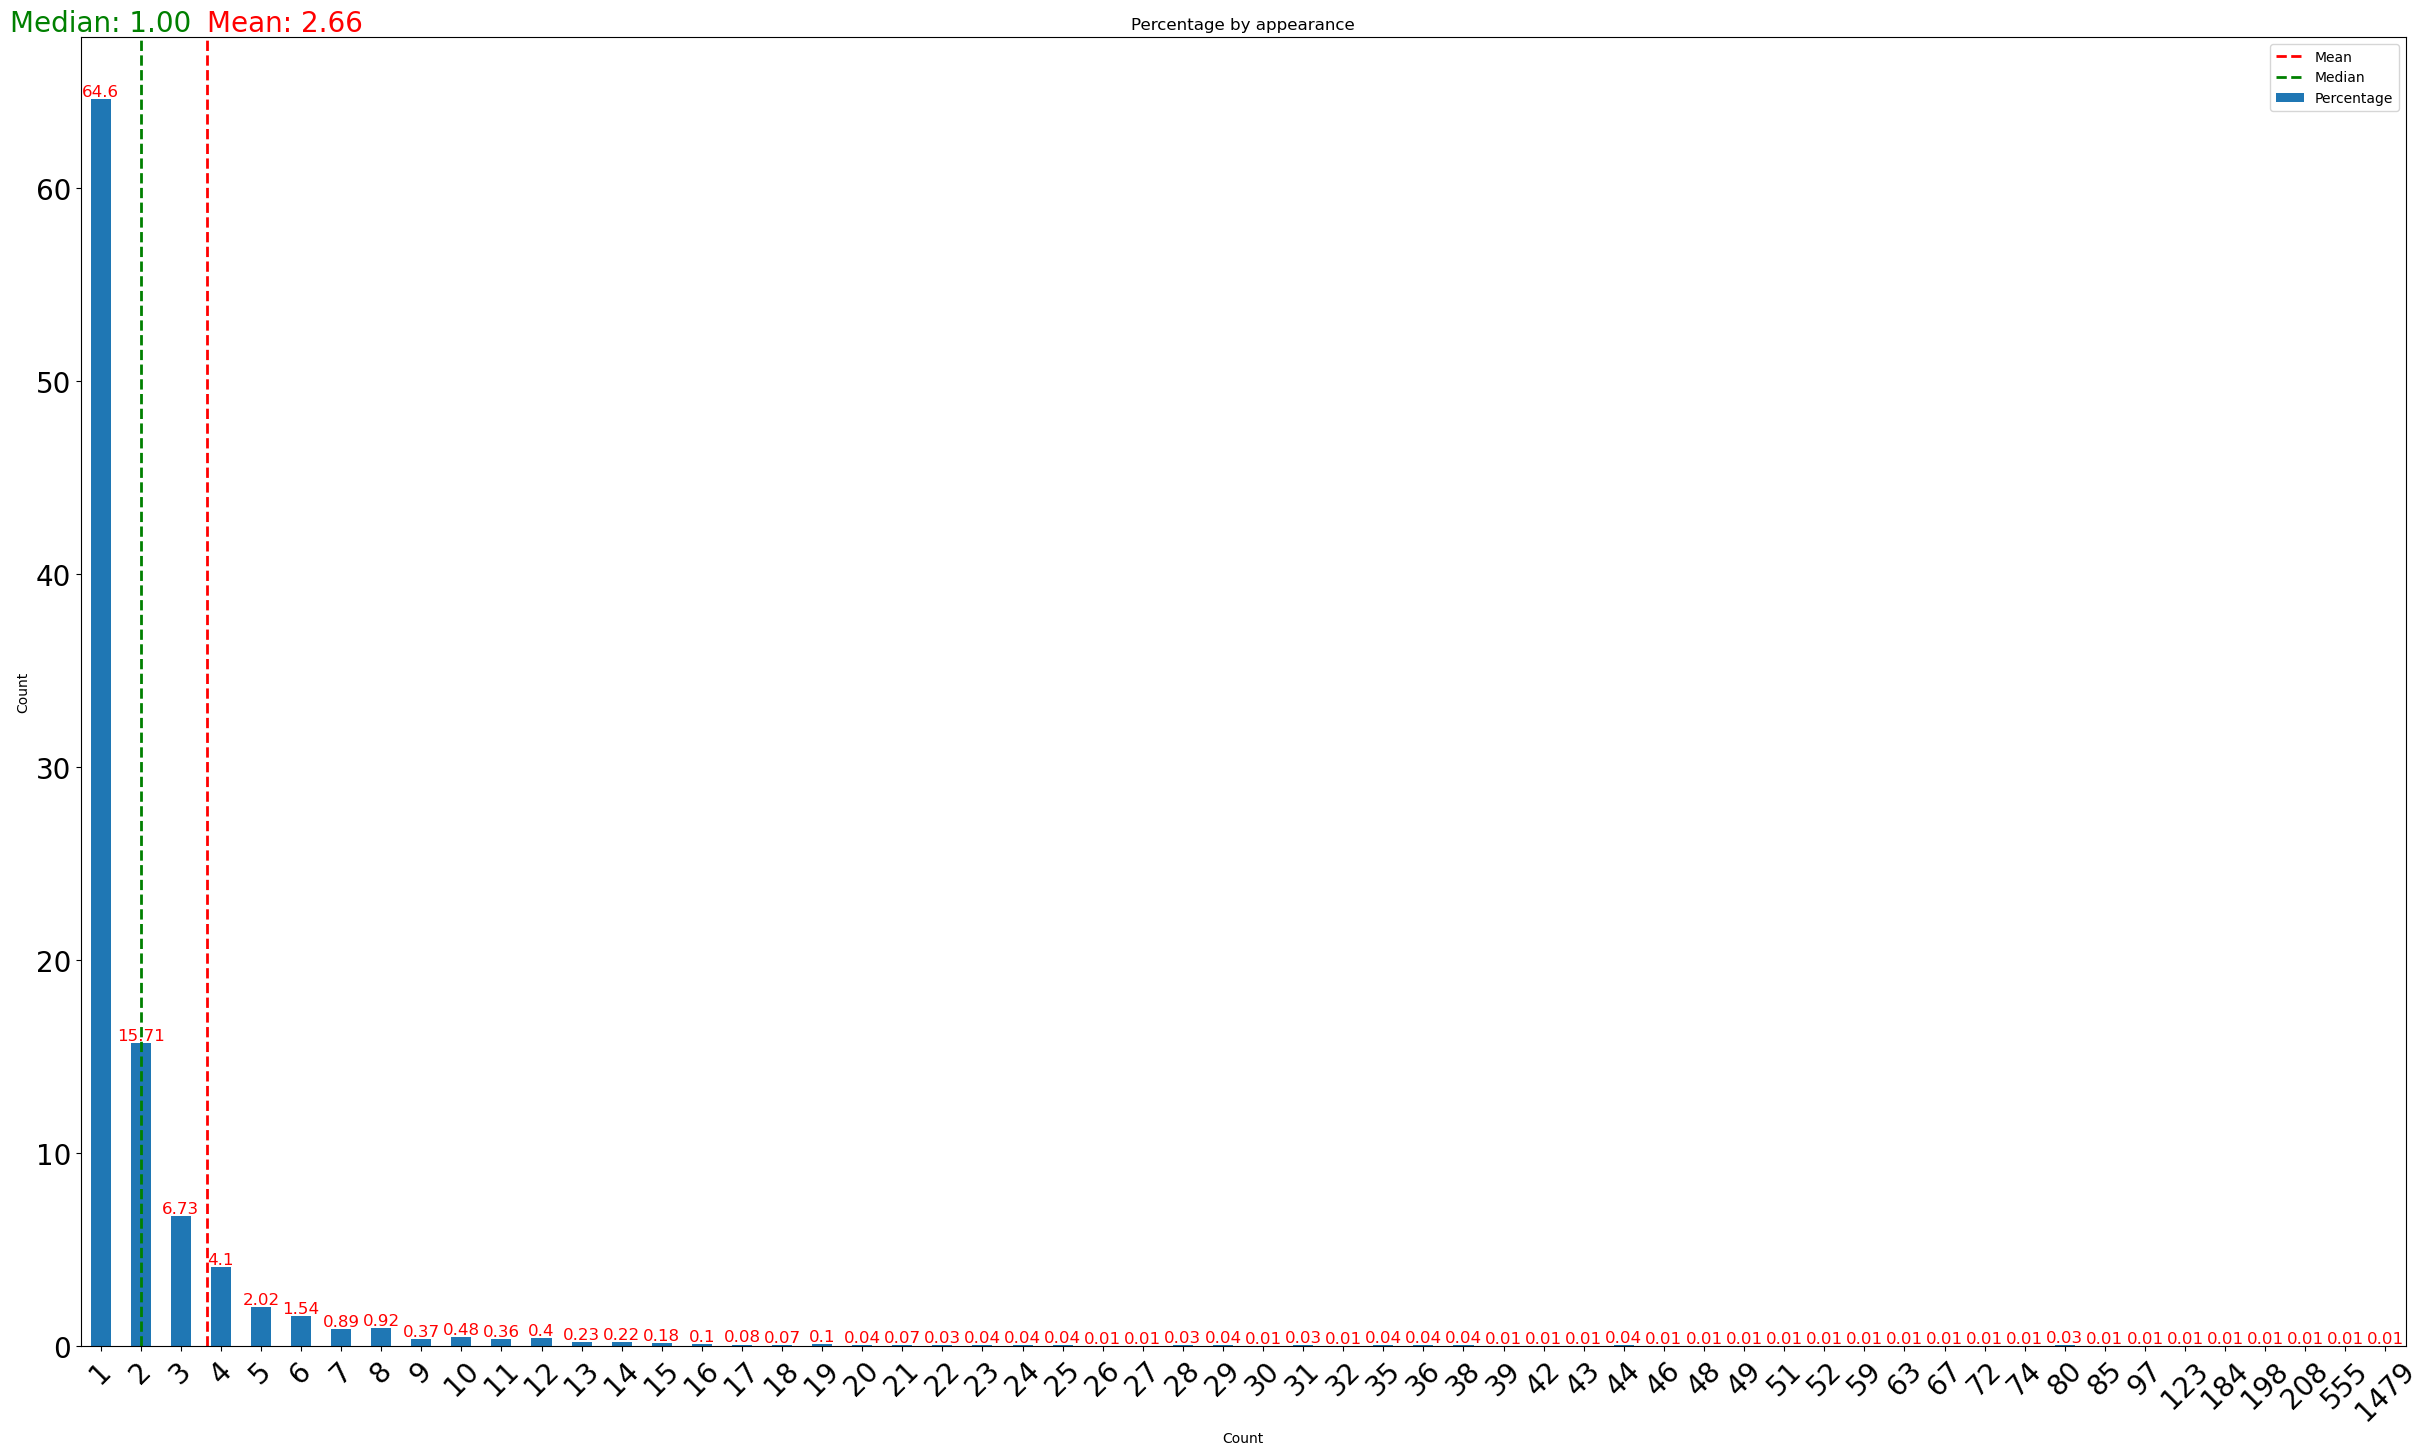

In [301]:
ax = df_Percentage.sort_values(by=['Count']).reset_index().drop("index",axis=1).plot.bar(x="Count", y="Percentage",rot=45, figsize=(30,17), ylabel="Count", title="Percentage by appearance", fontsize=20)

mean_percentage = df_cycle['Count'].mean()
ax.axvline(mean_percentage, color='red', linestyle='--', linewidth=2, label='Mean')

median_percentage = df_cycle['Count'].median()
ax.axvline(median_percentage, color='green', linestyle='--', linewidth=2, label='Median')

ax.legend()

mean_line_height = ax.get_ylim()[1]
ax.text(mean_percentage, mean_line_height, f"Mean: {mean_percentage:.2f}", fontsize=20, color='red', ha='left', va="bottom")


#ax.text(0, mean_percentage, f"Mean: {mean_percentage:.2f}", fontsize=16, color='red', ha='right', va="bottom",transform=ax.get_xaxis_transform())
ax.text(0, median_percentage, f"Median: {median_percentage:.2f}", fontsize=20, color='green', ha="center", va="bottom", transform=ax.get_xaxis_transform())

ax.bar_label(ax.containers[0], color="red", fontsize=12);


In [331]:
df_cycle[df_cycle.Count>10]

Cycle  Count
2     0x1d3a44f4ac3a7f603c58c0d8e4a4749ea1757af8-0xd...     11
11    0x0d1abd92905b877b0c42d955cc53ac655e3e7ba3-0x2...     36
16    0x4836ae11037f696693c2916834754fa6c2ecc27d-0xf...     23
23    0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24-0xe...   1479
24           0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24    555
...                                                 ...    ...
5756  0x31e6d7732c36e5f202912a7337ec3ce144ee6249-0xd...     15
6007  0x893480d472bb4bfe04d3768e3c9e7a6e4cfae7b6-0xd...     25
6170  0x8ae57a027c63fca8070d1bf38622321de8004c67-0xe...     11
6376  0x77b67ab4f40054ac53fe637413e377832928199c-0xd...     12
6971  0x10db943b724706c2afc1869a5555704c8bd5fd55-0xb...     16

[191 rows x 2 columns]

In [321]:
#json_data = json.loads(json_str)

json_data = D.copy()
# Initialiser une liste de cycles et un compteur pour chaque cycle
cycles_ad = []
counts_ad = []

for token_id in json_data:
    for cycle_id in json_data[token_id]:
        cycle_ad = json_data[token_id][cycle_id]
        transactions_ad = list(cycle_ad.keys())
        addresses_ad = set()
        
        addresses_ad.add(cycle_ad[transactions_ad[0]]['Sender'])
        addresses_ad.add(cycle_ad[transactions_ad[-1]]['Receiver'])
        cycle_str_ad = '-'.join(sorted(addresses_ad))
        if cycle_str_ad not in cycles_ad:
            cycles_ad.append(cycle_str_ad)
            counts_ad.append(1)
        else:
            index_ad = cycles_ad.index(cycle_str_ad)
            counts_ad[index_ad] += 1
                                                    

df_cycle_ad = pd.DataFrame({'Cycle': cycles_ad, 'Count': counts_ad})

# Définir l'index du dataframe comme la colonne 'Cycle'
#df_cycle.set_index('Cycle', inplace=True)

df_cycle_ad
                                                   

Cycle  Count
0     0x357931791284f40765b462aa7ad217ebf82920cb      1
1     0x5cbc5413637343eaab0784522c95b4686f5e96fd      1
2     0xfd1b8d2b036f7c78a794be2c6f9ba4de698459e8      1
3     0x1d3a44f4ac3a7f603c58c0d8e4a4749ea1757af8      8
4     0xd33bc4ab17ad58626fa74a8286d610ea16e731d8      3
...                                          ...    ...
4882  0x7949eb8e7b8d83eaa26d8ad2854e6d3c59da6813      7
4883  0x12662618779a4c1f4588503c1ee601f4cacddc05      1
4884  0x7af48dca3c8d6a7664a67a9e48730014f0c3a621      1
4885  0x304aa04d546750b0af651ecdbaf1aa1ca57e0b58      1
4886  0x30145d714db337606c8f520bee9a3e3eac910636      1

[4887 rows x 2 columns]

In [325]:
df_Percentage_ad = pd.DataFrame(df_cycle_ad["Count"].value_counts(normalize=True) * 100)
df_Percentage_ad

Count
1    53.509310
2    18.498056
3     9.719664
4     5.177000
5     2.741968
..         ...
108   0.020462
104   0.020462
85    0.020462
81    0.020462
43    0.020462

[64 rows x 1 columns]

In [327]:
df_Percentage_ad = df_Percentage_ad.rename(columns={"Count":"Percentage"})
df_Percentage_ad["Count"] = df_Percentage_ad.index
df_Percentage_ad = df_Percentage_ad.reset_index().drop(["index"],axis=1)
df_Percentage_ad.Percentage = df_Percentage_ad.Percentage.round(2)
df_Percentage_ad.sort_values(by=['Count']).reset_index().drop("index",axis=1)

Percentage  Count
0        53.51      1
1        18.50      2
2         9.72      3
3         5.18      4
4         2.74      5
..         ...    ...
59        0.02    193
60        0.02    322
61        0.02    475
62        0.02   1601
63        0.02   2126

[64 rows x 2 columns]

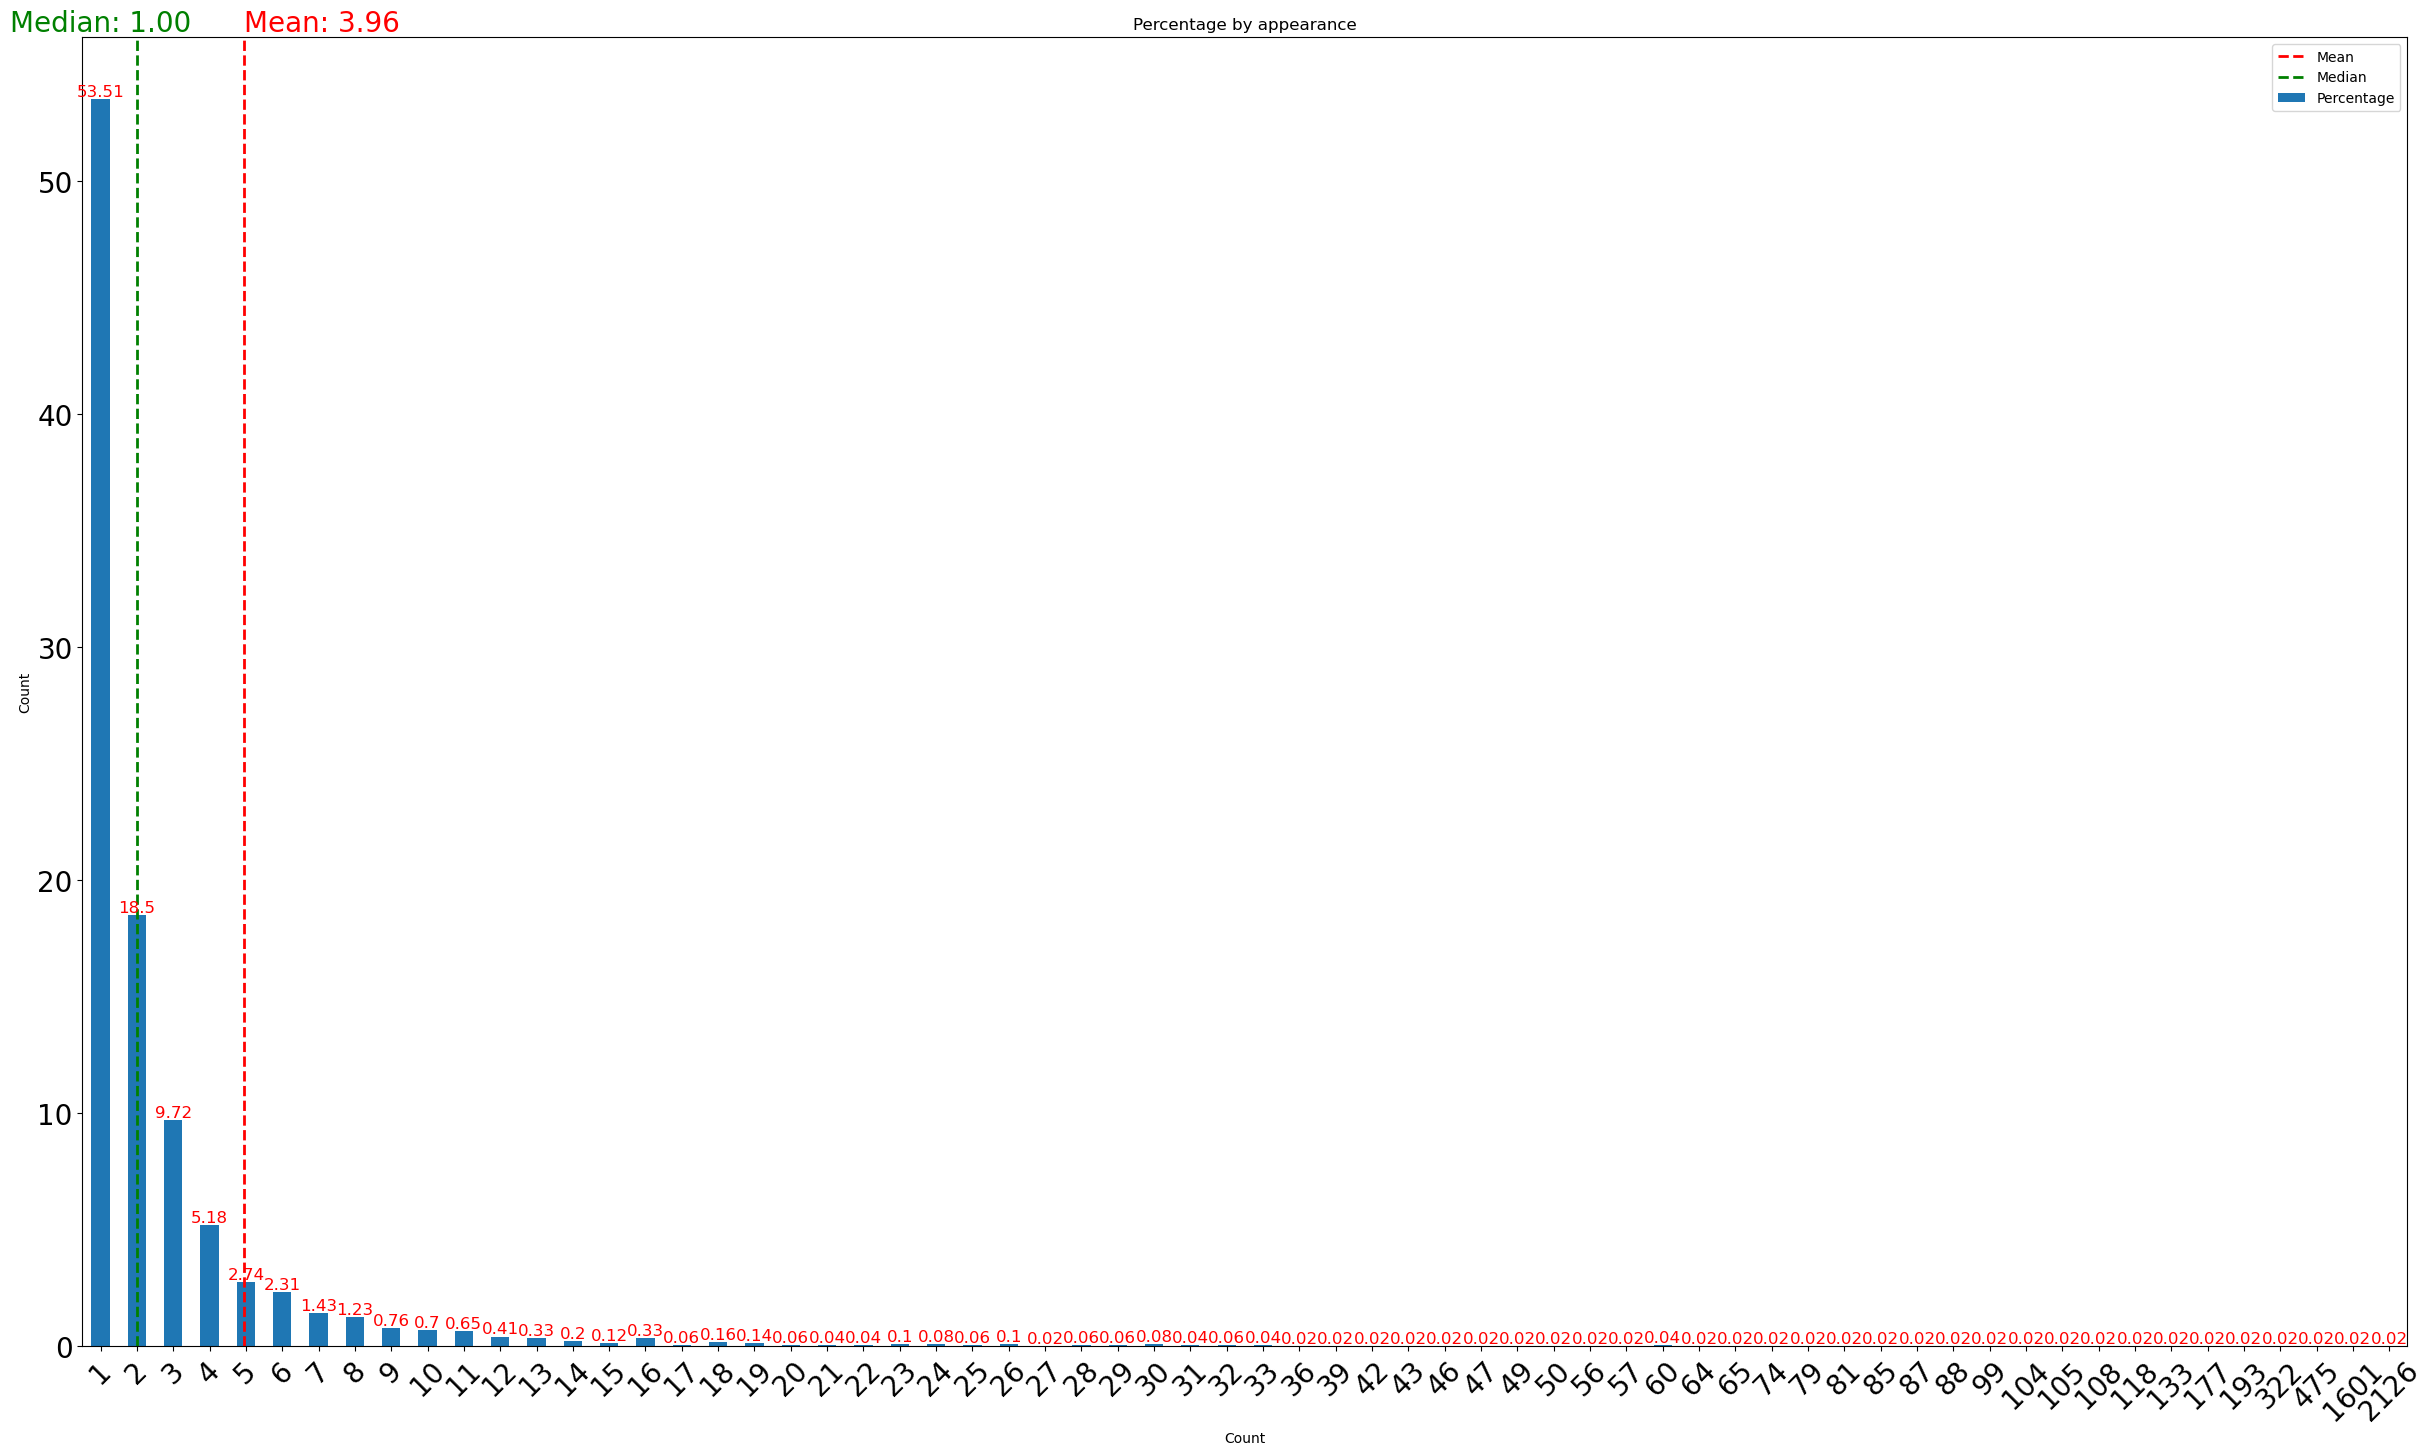

In [328]:
ax = df_Percentage_ad.sort_values(by=['Count']).reset_index().drop("index",axis=1).plot.bar(x="Count", y="Percentage",rot=45, figsize=(30,17), ylabel="Count", title="Percentage by appearance", fontsize=20)

mean_percentage = df_cycle_ad['Count'].mean()
ax.axvline(mean_percentage, color='red', linestyle='--', linewidth=2, label='Mean')

median_percentage = df_cycle_ad['Count'].median()
ax.axvline(median_percentage, color='green', linestyle='--', linewidth=2, label='Median')

ax.legend()

mean_line_height = ax.get_ylim()[1]
ax.text(mean_percentage, mean_line_height, f"Mean: {mean_percentage:.2f}", fontsize=20, color='red', ha='left', va="bottom")


#ax.text(0, mean_percentage, f"Mean: {mean_percentage:.2f}", fontsize=16, color='red', ha='right', va="bottom",transform=ax.get_xaxis_transform())
ax.text(0, median_percentage, f"Median: {median_percentage:.2f}", fontsize=20, color='green', ha="center", va="bottom", transform=ax.get_xaxis_transform())

ax.bar_label(ax.containers[0], color="red", fontsize=12);


In [330]:
df_cycle_ad[df_cycle_ad.Count>60]

Cycle  Count
15   0x13d8faf4a690f5ae52e2d2c52938d1167057b9af    118
16   0x2c2ed4b3876c442fee80bee76ce0ee2ca2a512af     99
24   0xac707ee01a605bfc712536d703e5e790357c48e5     65
25   0xed2ab4948ba6a909a7751dec4f34f303eb8c7236   1601
27   0xdbfd76af2157dc15ee4e57f3f942bb45ba84af24   2126
29   0x72fae93d08a060a7f0a8919708c0db74ca46cbb6     81
43   0xc310e760778ecbca4c65b6c559874757a4c4ece0    475
68   0xd38a87d7b690323ef6883e887614502abcf9b1eb     74
89   0xc67db0df922238979da0fd00d46016e8ae14cecb    322
108  0x88341d1a8f672d2780c8dc725902aae72f143b0c    133
109  0xf896527c49b44aab3cf22ae356fa3af8e331f280    177
143  0xaf93fcce0548d3124a5fc3045adaf1dde4e8bf7e    193
170  0x28f8ca3b0eddd849c93986df0fd194252c4e4b03    108
171  0x98e711f31e49c2e50c1a290b6f2b1e493e43ea76    104
183  0x7c15561590fc9eb063b3803b55165633eef207ec     85
213  0xacdaeeb57ff6886fc8e203b9dd4c2b241df89b7a     79
284  0xdb5485c85bd95f38f9def0ca85499ef67dc581c0    105
334  0x619866736a3a101f65cff3a8c3d2602fc54fd749     88
454  0x19fffb371b95574df860e90b6a5b69256629b585     87
920  0xd83c7bced50ba86f1c1fbf29abba278e3659f72a     64

***